## Project Name - **Loan Application Status Prediction**


##### Name - Aman Mulla.
##### Batch - DS2307



# **Project Summary -**

This project involves creating a predictive model to determine loan approval based on various applicant details provided in the dataset. The dataset encompasses information like gender, marital status, dependents, education level, employment status, income details, loan amount, credit history, property area, and the loan status (approved or not).

To develop the predictive model, various machine learning algorithms can be employed, leveraging the dataset's independent variables to predict the dependent variable, i.e., loan status. Preprocessing steps such as handling missing values, encoding categorical variables, and scaling numerical features may be necessary. Exploratory data analysis (EDA) will be crucial to understand correlations and patterns among variables. Feature selection techniques can optimize model performance by focusing on the most influential factors.

The model's evaluation will involve metrics such as accuracy, precision, recall, and F1-score to gauge its predictive capabilities. Techniques like cross-validation and hyperparameter tuning can enhance the model's accuracy and generalizability. Ultimately, this predictive model aims to assist financial institutions in assessing loan eligibility efficiently, improving decision-making processes, and reducing risks associated with loan approvals.

Varibales in Dataset:
1.   **Loan_ID**: Unique identifier for each applicant's loan application.
2.   **Gender**: Categorization of applicants into male or female based on reproductive attributes.
3.   **Married**: Indicates the marital status of the applicant, whether in a state of matrimony or not.
4.   **Dependents**: Represents the number of individuals reliant on the applicant for sustenance.
5.   **Education**: Denotes the level of formal education received by the applicant, typically measured in years of instruction from schools or universities.
6.   **Self_Employed**: Indicates whether the applicant is self-employed or working for an employer.
7.   **Applicant Income**: Total disposable income available to the applicant as per state law.
8.   **CoapplicantIncom**: Disposable income available to other individuals involved in the loan application process, alongside the main applicant, under state law.
9.   **Loan_Amount**: The total amount of money the applicant currently owes.
10.   **Loan_Amount_Term**: Duration or period for which the loan is made available to the applicant.
11.   **Credit History**: A record detailing the applicant's past behavior and ability to repay debts, demonstrating responsibility in repayment.
12.   **Property_Area**: Total area within the property's boundaries as defined in the schedule.
13.   **Loan_Status**: Indicates whether the applicant is eligible and approved for the requested loan.

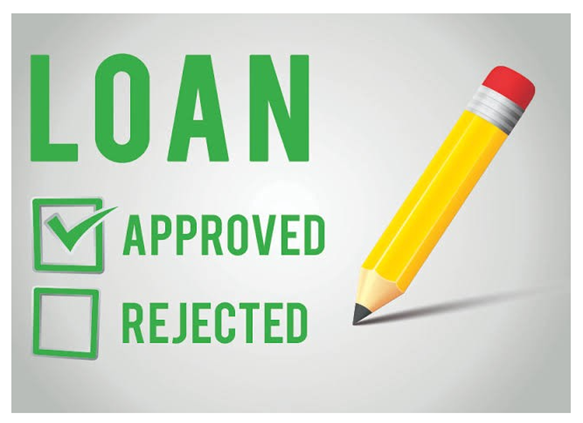

# **Problem Statement**

**The task at hand involves crafting a predictive model to determine loan approval based on applicant details within the provided dataset. The objective is to develop an algorithm that accurately forecasts whether an applicant's loan will be approved or not (Loan_Status) using various independent variables such as gender, marital status, income, credit history, and more. The problem statement revolves around creating a robust model that leverages these features to predict loan approval status.**

The goal is to develop a predictive framework that can assist financial institutions in assessing loan applications efficiently, reducing the risk of non-performing loans, and streamlining the approval process. The model's success will be gauged on its ability to accurately classify loan approvals, thereby aiding in sound decision-making for loan disbursement.

## Knowing data and variable in dataset

In [ ]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#pd.set_option('display.max_rows', None)

In [ ]:
loan_status = pd.read_csv('/content/drive/MyDrive/DataSets/loan_prediction_Project.csv')

loan_status

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**We can observe no need to change any of column name as we dont fount any space and special charater except '_'.**

In [ ]:
# Will Check for shape of dataset

loan_status.shape

(614, 13)

**We have total 614 rows and 13 columns in our dataset.**

**Dateset Information**

In [ ]:
loan_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**From .info(), we can observe that there were varaibles with datatype of float,int and object.**

In [ ]:
loan_status.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


From .describe() we can get count, mean, minimum value, maximum values and quirtile value for each numerical column.

**Will Check for Null value in dataset**

In [ ]:
loan_status.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

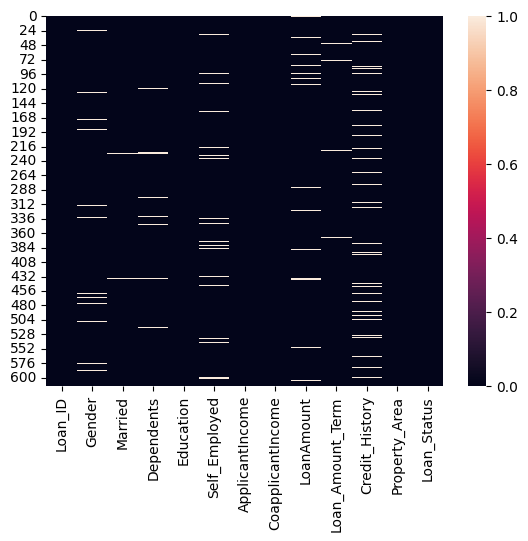

In [ ]:
sns.heatmap(loan_status.isnull())

**From above heatmap w can observe haveing null values in column Gender,Married,Dependens,Education,Self_employed,LoanAmount,Loan_Amount_term,Credit_History.**

In [ ]:
# Handling Numerical missing Data

loan_status['LoanAmount'] = loan_status['LoanAmount'].fillna(loan_status['LoanAmount'].mean())
loan_status['Loan_Amount_Term'] = loan_status['Loan_Amount_Term'].fillna(loan_status['Loan_Amount_Term'].mean())
loan_status['Credit_History'] = loan_status['Credit_History'].fillna(loan_status['Credit_History'].mean())

# handle categorical missing data

loan_status['Gender'] = loan_status['Gender'].fillna(loan_status['Gender'].mode()[0])
loan_status['Married'] = loan_status['Married'].fillna(loan_status['Married'].mode()[0])
loan_status['Dependents'] = loan_status['Dependents'].fillna(loan_status['Dependents'].mode()[0])
loan_status['Self_Employed'] = loan_status['Self_Employed'].fillna(loan_status['Self_Employed'].mode()[0])

<Axes: >

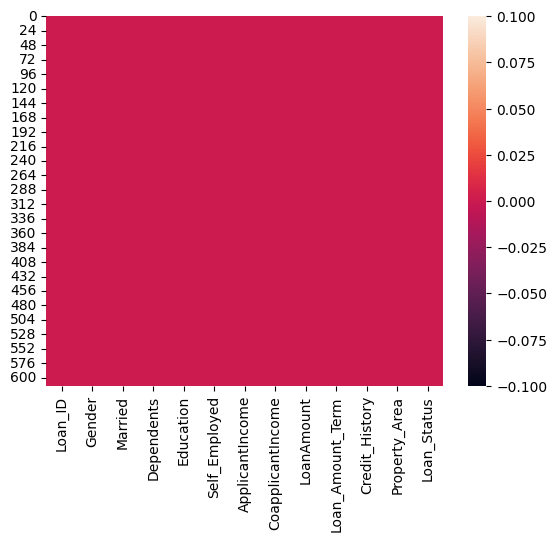

In [ ]:
loan_status.isnull().sum()

sns.heatmap(loan_status.isnull())

#### Chart - 1

### **Distribution of Applicant Income**

5403.459283387622


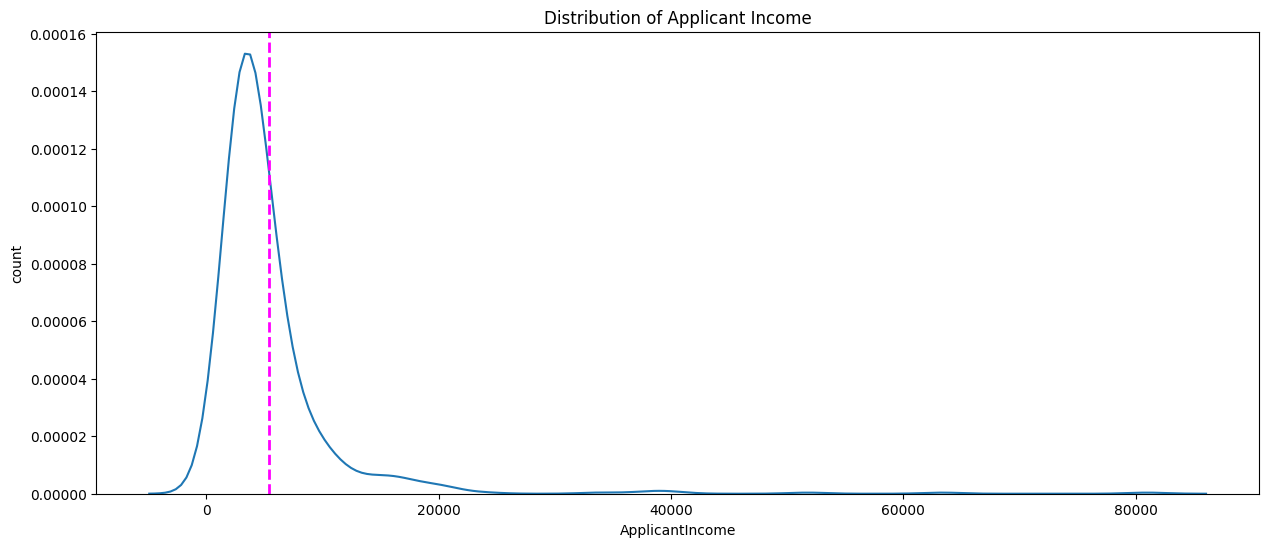

In [ ]:
ApplicantIncome_mean = loan_status['ApplicantIncome'].mean()
print(ApplicantIncome_mean)

plt.figure(figsize=(15,6))
sns.kdeplot(data=loan_status,x='ApplicantIncome')
plt.axvline(ApplicantIncome_mean, color='magenta', linestyle='dashed', linewidth=2, label=f'Mean: {ApplicantIncome_mean}')
plt.xlabel('ApplicantIncome')
plt.ylabel('count')
plt.title('Distribution of Applicant Income')
plt.show()

**Insights from above plot**: The KDE plot showcases the shape of the 'ApplicantIncome' distribution, providing an overview of its density across different income levels.

* The peak in the curve highlight the density or concentration of incomes around specific values which is near about 4500 to 5200.
* The dashed magenta line represents the mean applicant income which is 5403, visibly cutting through the distribution curve.
* The distribution appears to be slightly right skewed, suggesting that the applicant incomes aren't uniformly distributed. There might be clusters or groups of income levels within the dataset.


#### Chart - 2

### **Loan Amount by Education Level**

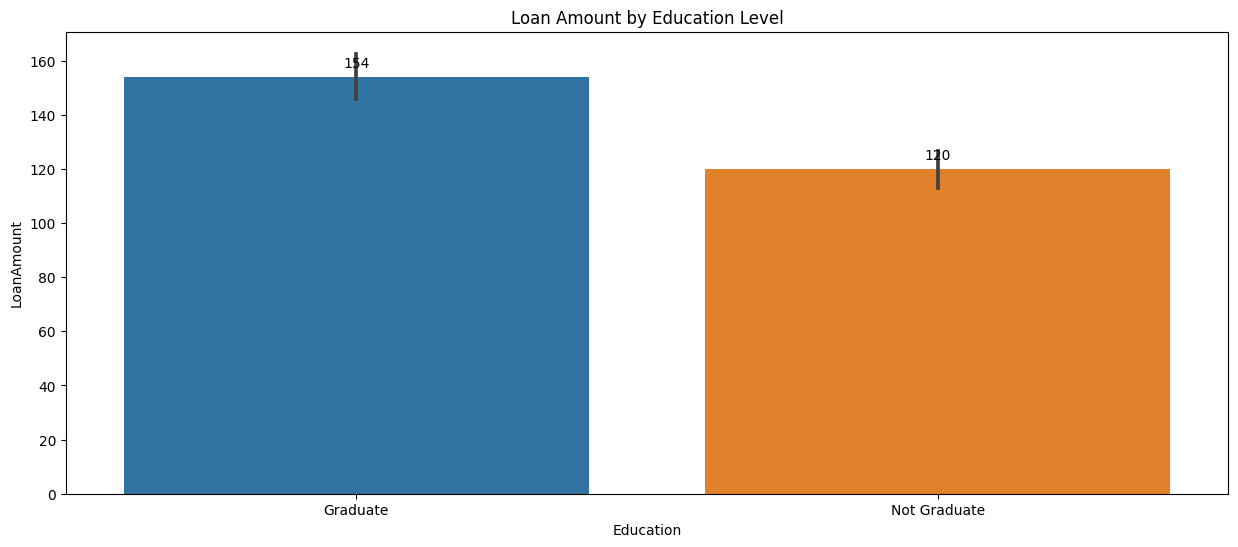

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.barplot(loan_status, x = 'Education',y='LoanAmount')

# Adding data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.xlabel('Education')
plt.ylabel('LoanAmount')
plt.title('Loan Amount by Education Level')
plt.show()

**Insights from above plot**: It shows the average loan amount sanctioned based on different education levels.
* There is visible difference in loan amounts between higher educated individuals (graduates) and those with lower education levels (not graduated)
* Higher education might correlate with larger loan amounts, indicating a possible relationship between education level and borrowing capacity or loan eligibility.
* Individuals with higher education might seek larger loans for investments such as higher studies or business ventures, influencing their borrowing patterns.
*  Lenders/banks might assess risk differently based on education levels, potentially offering different loan terms or amounts based on the applicant's educational background.


#### Chart - 3

### **Loan Status Across Gender**

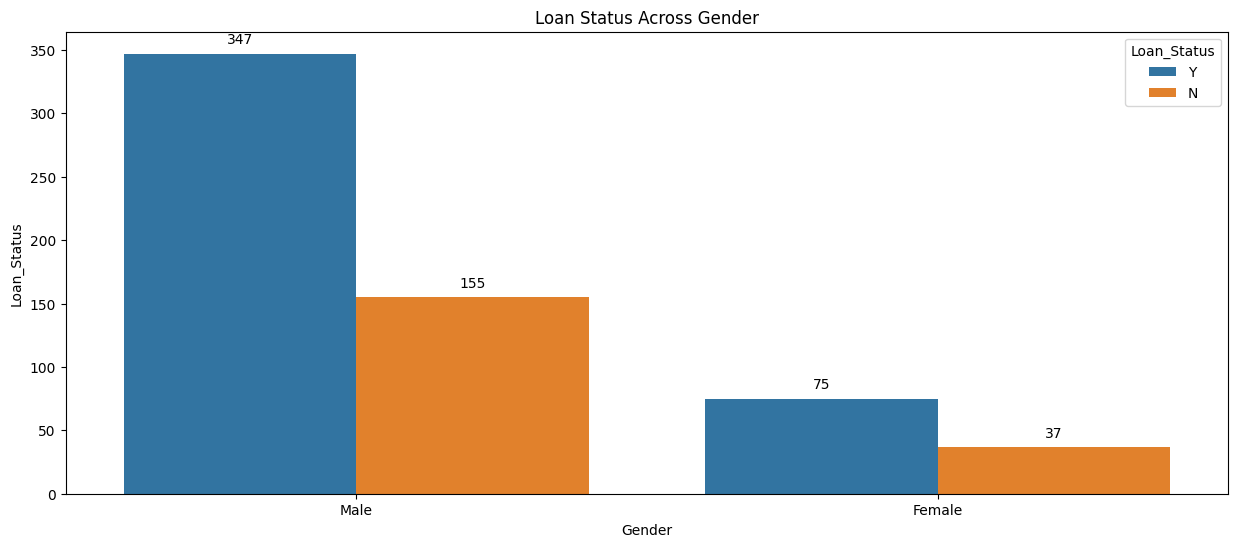

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.countplot(loan_status, x = 'Gender',hue='Loan_Status')

# Adding data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.xlabel('Gender')
plt.ylabel('Loan_Status')
plt.title('Loan Status Across Gender')
plt.show()



**Insights from above plot**: The visualization compares the count of loan approvals and rejections across different genders.It represents how many loans were approved ('Y' - Yes) and rejected ('N' - No) for each gender category.
* The count bars showcase the distribution of loan approvals and rejections among different genders.For Male, loan approval count is higher (347) that Female (75). Similarly, Loan rejection count is more for male (155) and for Female it is (37)

**Possible Reasons**

* On average, males have higher incomes compared to females in the dataset, it could lead to a higher number of approved loans. Lenders often consider income as a crucial factor in loan approvals.
* Certain industries or occupations might be predominantly male-dominated, leading to a higher number of male applicants. If these industries are perceived as more stable or secure, it could impact approval rates.
* Male applicants might apply for higher loan amounts or different types of loans that have higher approval rates, influencing the overall count of approvals.


#### Chart - 4

### **LoanAmount by Credit History**

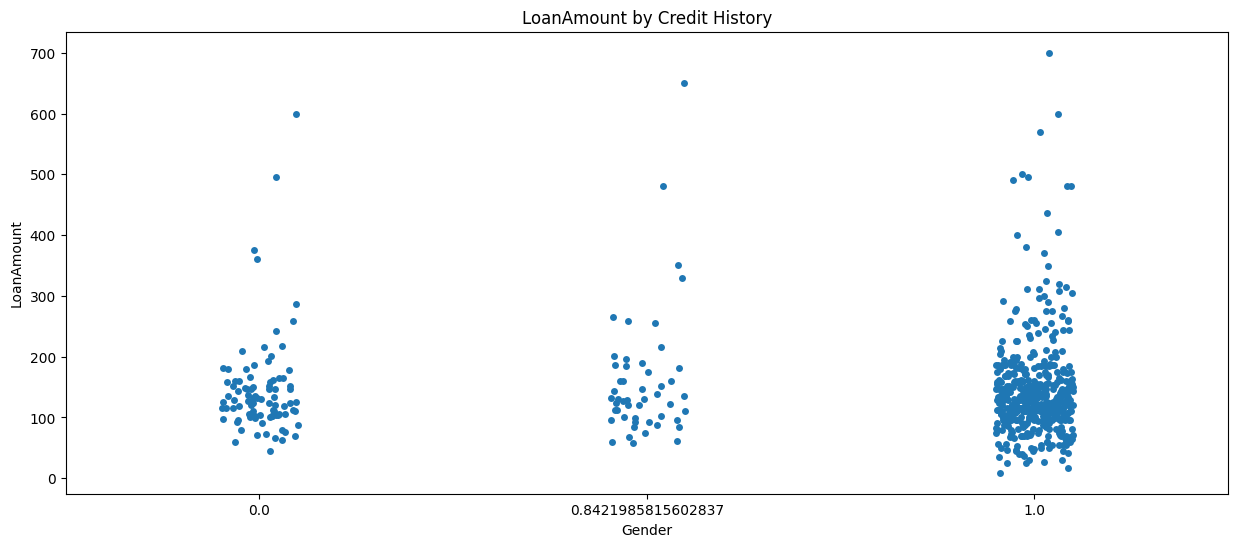

In [ ]:
plt.figure(figsize=(15,6))
sns.stripplot(loan_status, x = 'Credit_History',y='LoanAmount')
plt.xlabel('Gender')
plt.ylabel('LoanAmount')
plt.title('LoanAmount by Credit History')
plt.show()

**Insights from above plot**:

* Customers with a credit history as 1.0 tend to have a wider range of loan amounts compared to those without a credit history.
* There appears to be a higher concentration of loan amounts for applicants with a credit history. However, there are fewer instances of applicants without a credit history obtaining higher loan amounts.
* The presence of outliers among applicants with a credit history could indicate varying risk profiles within this group. Some applicants with a strong credit history might still apply for smaller loans, while others might seek significantly larger amounts.


#### Chart - 5

### **Property Area Distribution**

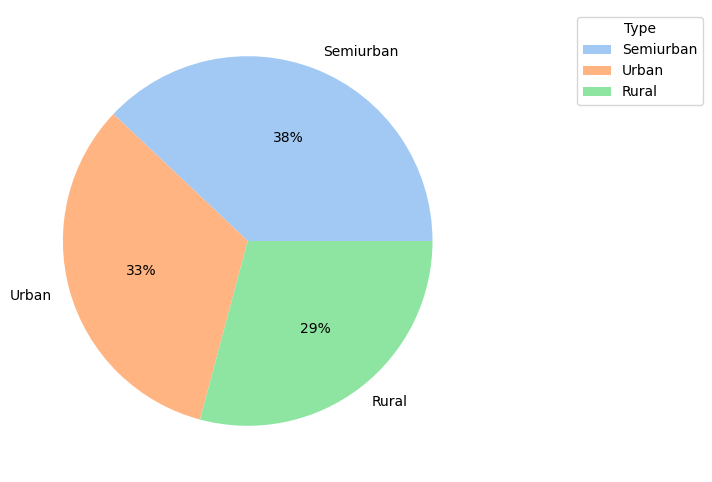

In [ ]:
property_dist = loan_status['Property_Area'].value_counts()

property_dist

labels = property_dist.index

plt.figure(figsize=(15,6))
sns.set_palette('pastel')
plt.pie(property_dist,labels=property_dist.index,autopct='%.0f%%')
plt.legend(labels, title="Type", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

**Insights from above plot**:

* The pie chart showcases the distribution of different property areas among the dataset.
* Each slice of the pie represents the proportion of each property area within the dataset.For Semiurban it's 38%, For Urban 33% and For Rural 29%.
* The larger segments suggest areas where more investments or applications for loans concentrated.Conversely, smaller segments signify areas that are less represented or potentially less targeted.

#### Chart - 6

### **Loan Amount Term Distribution**

<Figure size 1500x600 with 0 Axes>

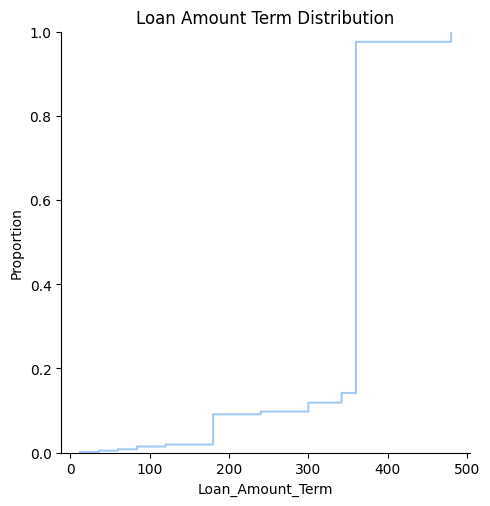

In [ ]:
plt.figure(figsize=(15,6))
sns.displot(data=loan_status,x="Loan_Amount_Term",kind='ecdf')
plt.xlabel('Loan_Amount_Term')
plt.title('Loan Amount Term Distribution')
plt.show()

**Insights from above plot**: An empirical cumulative distribution function (ECDF) plot for the 'Loan_Amount_Term' column in your dataset.

* Most loan terms are clustered around specific values. There might be peaks or plateaus in the plot, indicating common durations for loan terms.
* The ECDF curve's shape reveals the spread of loan term values. A steeper curve indicates a narrower range of loan term durations, while a flatter curve suggests a wider distribution.
* By identifying the point where the curve reaches certain percentages (e.g., 25%, 50%, 75%), you can determine common loan term durations preferred by borrowers.

#### Chart - 7

### **Relationship between Applicant and Co-applicant Income**

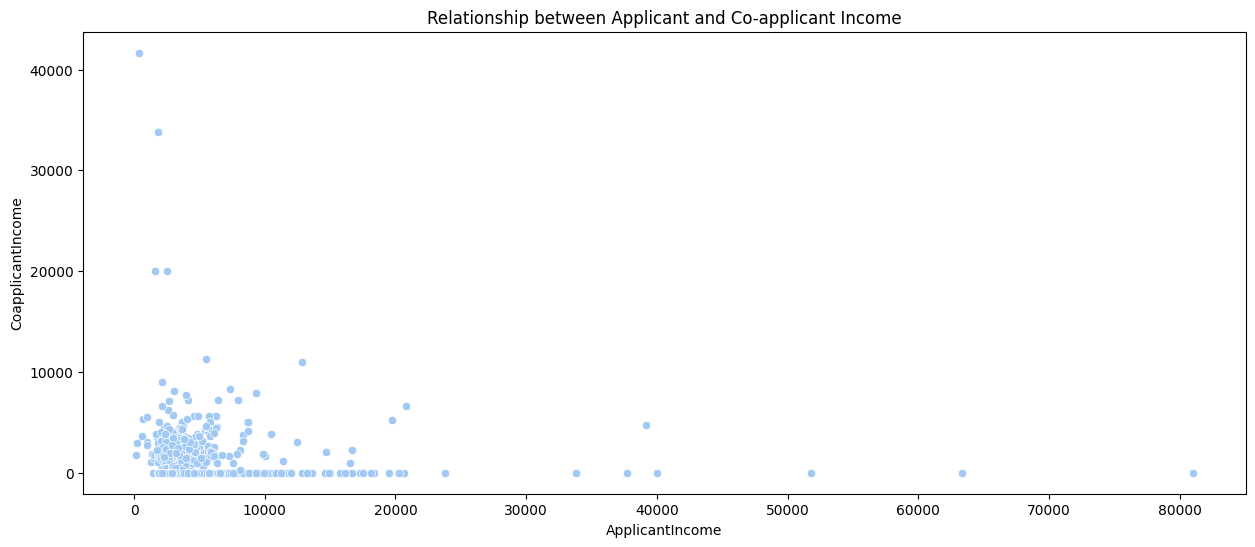

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=loan_status,x='ApplicantIncome',y='CoapplicantIncome')
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')
plt.title('Relationship between Applicant and Co-applicant Income')
plt.show()

**Insights from above plot**: The scatterplot visualizes the relationship between 'ApplicantIncome' and 'CoapplicantIncome'.

* The majority of data points cluster around lower values of both 'ApplicantIncome' and 'CoapplicantIncome'. This suggests that a significant portion of applicants and co-applicants have lower incomes.
* Few data points extend towards higher 'ApplicantIncome' and 'CoapplicantIncome'. This indicates a smaller number of applicants or co-applicants with higher combined incomes.
* There are a few outliers where 'ApplicantIncome' is relatively high compared to 'CoapplicantIncome'.

#### Chart - 8

### **Loan Status by Marriage Status & Self_Employed**

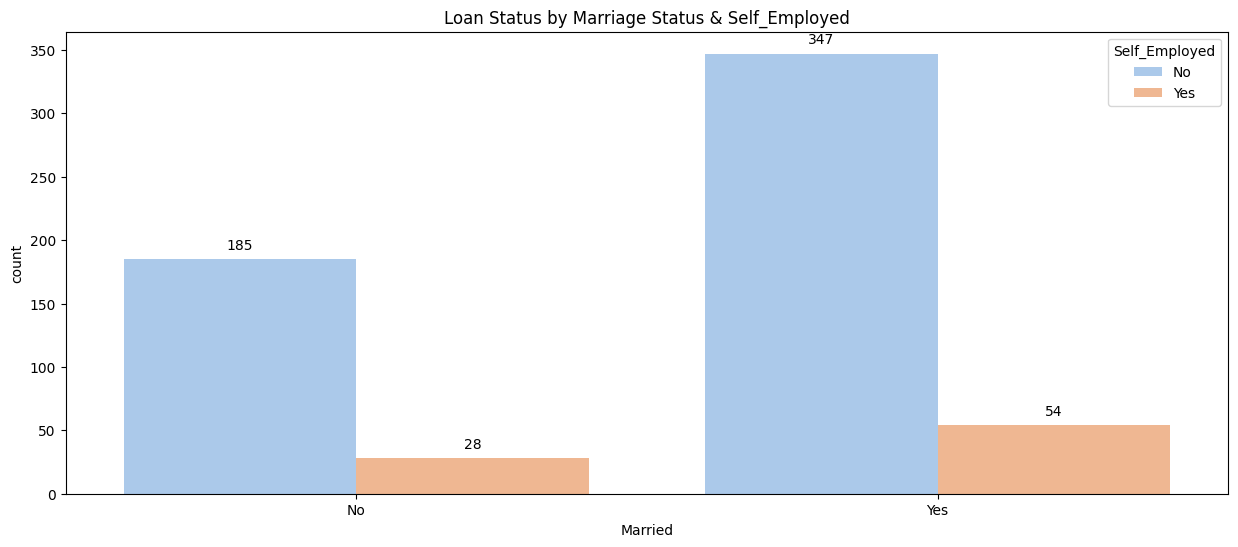

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.countplot(loan_status, x = 'Married',hue='Self_Employed')

# Adding data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.xlabel('Married')
plt.title('Loan Status by Marriage Status & Self_Employed')
plt.show()

**Insights from above plot**: The chart represent the count of loan statuses categorized by the 'Married' and 'self-employed' status of the applicants.

* Married individuals seem to have a higher count across both self-employment categories ('Self_Employed' and 'Not Self_Employed') compared to single individuals.
* The 'Not Self_Employed' category appears to have a higher count of approved loans compared to 'Self_Employed' individuals in both 'Married' and 'Single' statuses.
* The count of approved loans is notably higher for married individuals compared to single individuals, especially within the 'Not Self_Employed' category.
* Based on this analysis, targeting financial products or services to support self-employed individuals might be beneficial. Additionally, understanding why self-employed individuals face more rejections could provide insights for tailored lending solutions.

#### Chart - 9

### **Dependents vs. Loan Approval**

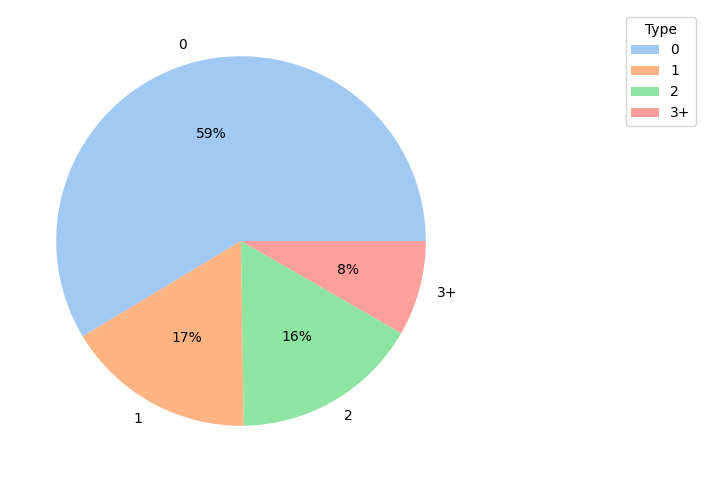

In [ ]:
dependents_dist = loan_status['Dependents'].value_counts()

dependents_dist

labels = dependents_dist.index

plt.figure(figsize=(15,6))
sns.set_palette('pastel')
plt.pie(dependents_dist,labels=dependents_dist.index,autopct='%.0f%%')
plt.legend(labels, title="Type", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

**Insights from above plot**: The pie chart illustrating the distribution of 'Dependents' in the 'loan_status' dataset.

* The pie chart reveals the distribution across different categories of dependents. It displays the percentage breakdown of applicants with 0, 1, 2, or more dependents.
* A significant proportion of applicants have '0' or '1' dependent, as indicated by larger slices in the pie chart.
* Applicants with '2' or '3+' dependents seem to be comparatively lower in number, shown by smaller sections in the pie chart.

#### Chart - 10

### **Applicant Income by Education Level**

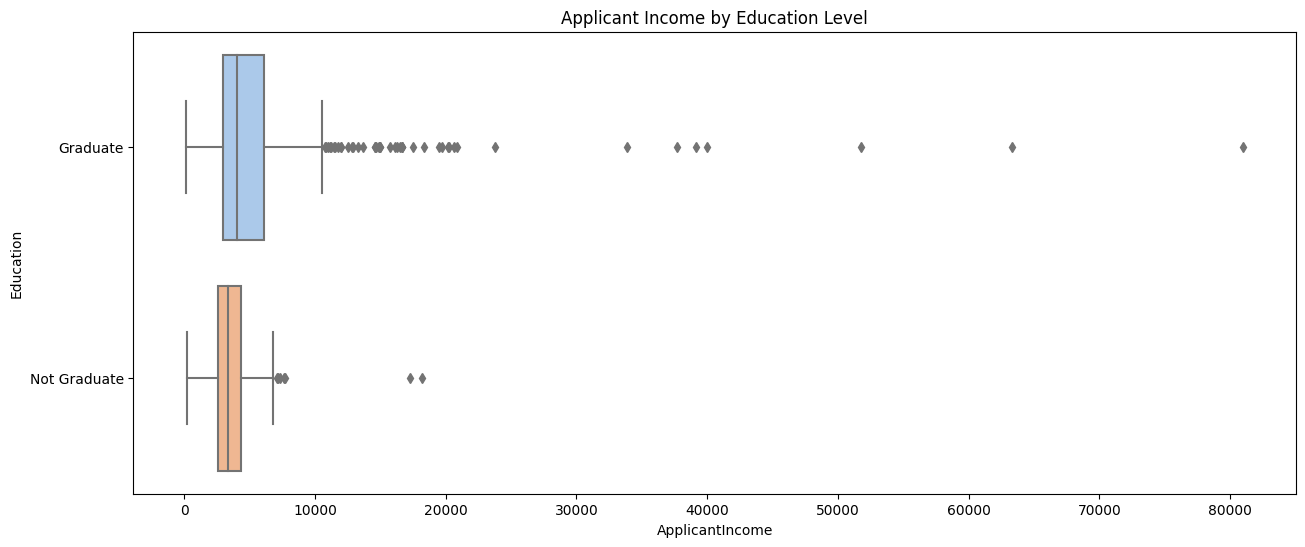

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(loan_status,x='ApplicantIncome',y='Education')
plt.xlabel('ApplicantIncome')
plt.ylabel('Education')
plt.title('Applicant Income by Education Level')
plt.show()

**Insights from above plot**:

* Higher education levels have a wider range of incomes, visible from the varying lengths of the boxplots.There are outliers present in most education levels, indicating individuals with significantly higher incomes within each category.
* 'Postgraduate' education tends to have a more concentrated income range with fewer outliers, suggesting a more consistent income distribution within this group.

#### Chart - 11

### **Loan Amount by Property Area**

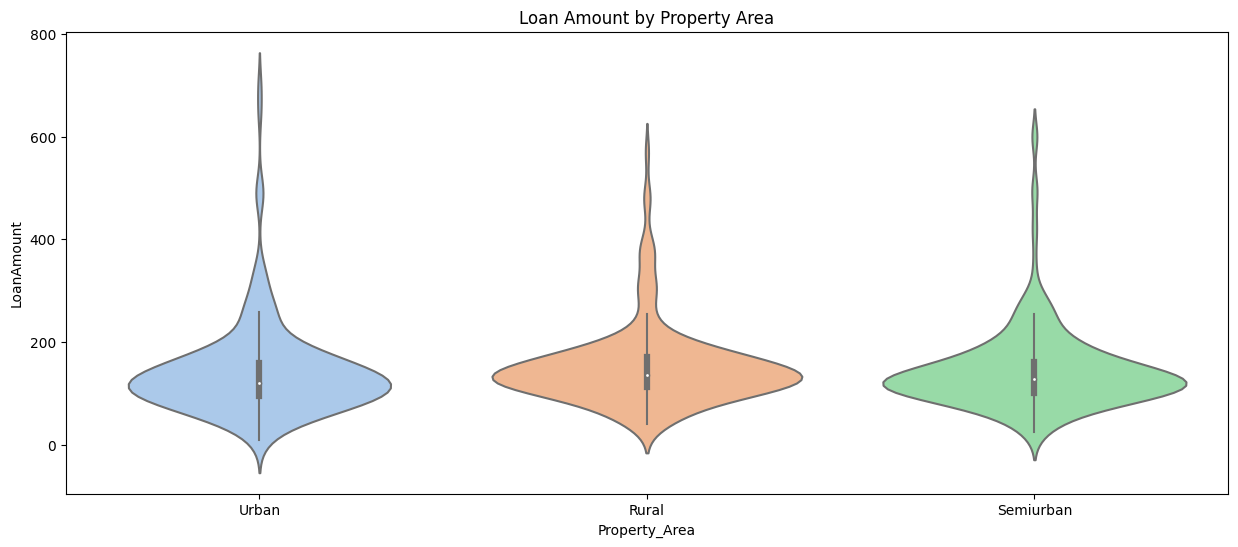

In [ ]:
plt.figure(figsize = (15,6))
sns.violinplot(loan_status,x='Property_Area',y='LoanAmount')
plt.xlabel('Property_Area')
plt.ylabel('LoanAmount')
plt.title('Loan Amount by Property Area')
plt.show()

**Insights from above plot**:

* The 'Semiurban' area tends to have a wider distribution of loan amounts compared to 'Urban' and 'Rural' areas.'Urban' areas generally exhibit a relatively higher median loan amount compared to 'Rural' areas.
* The spread of loan amounts in the 'Semiurban' area is more diverse, with a broader range of loan values compared to other areas.'Rural' areas display a comparatively narrower spread of loan amounts, indicating a tendency toward more consistent borrowing within this category.
* 'Urban' areas have a slightly higher median loan amount compared to 'Rural' areas, while 'Semiurban' areas show variability with some values surpassing the medians of other areas.

#### Chart - 12

### **Distribution of Marital Status**

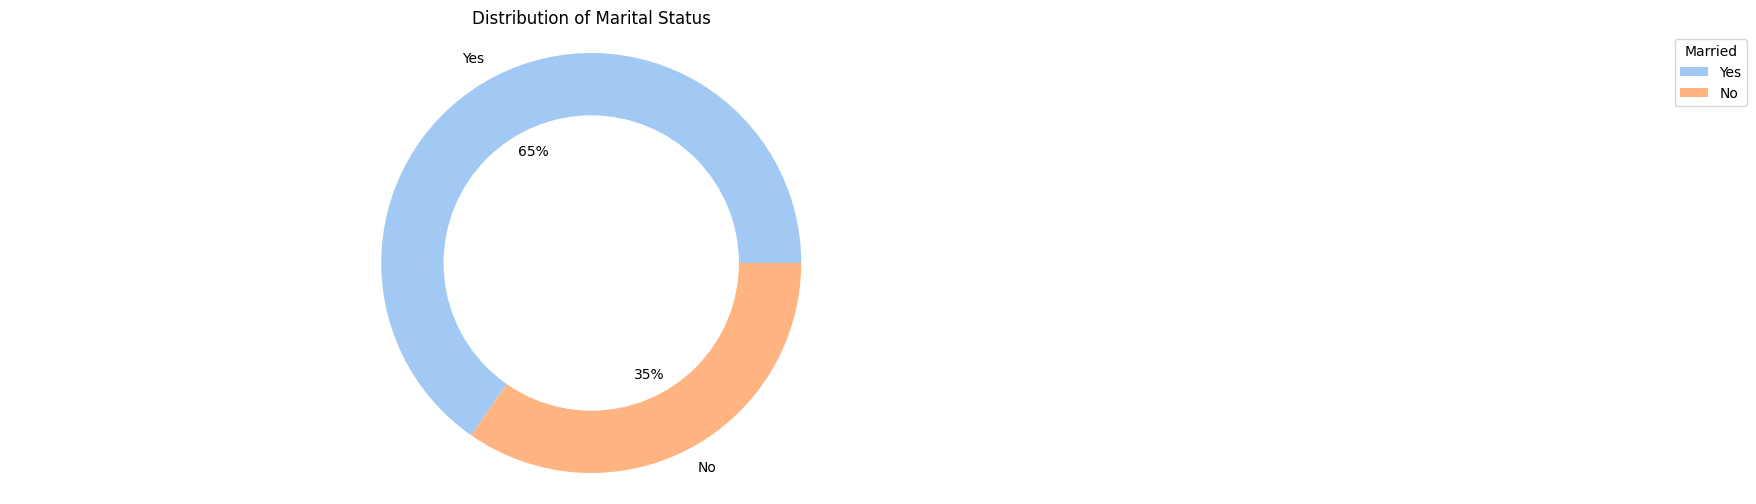

In [ ]:
married_dist = loan_status['Married'].value_counts()

married_dist

labels = married_dist.index


fig, ax = plt.subplots(figsize=(15,6))
ax.pie(married_dist,labels=married_dist.index,autopct='%.0f%%')

# Draw a circle to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.7, color='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, title="Married", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribution of Marital Status')
plt.show()

## **To get Pairplot and Heatmap for all varibale, first will convert all variables in numerical form.**

In [ ]:
# In dataset we have object type data for 'Gender','Married','Education','Self_Employed','Property_Area','Loan_Status'.Will do encoding for all columns.

# For Gender Column
gender_nums = {"Gender": {'Male':1, 'Female':0}}
gender_nums

loan_status = loan_status.replace(gender_nums)

# For Married Column
Married_nums = {"Married": {'Yes':1, 'No':0}}
Married_nums

loan_status = loan_status.replace(Married_nums)

# For Education Column
Education_nums = {"Education": {'Graduate':1, 'Not Graduate':0}}
Education_nums

loan_status = loan_status.replace(Education_nums)

# For Self_Employed column
Self_Employed_nums = {"Self_Employed": {'Yes':1, 'No':0}}
Self_Employed_nums

loan_status = loan_status.replace(Self_Employed_nums)

# For Property_Area column
Property_Area_nums = {"Property_Area": {'Semiurban':1, 'Urban':2,'Rural':3}}
Property_Area_nums

loan_status = loan_status.replace(Property_Area_nums)

# For Loan_Status colums
Loan_Status_nums = {"Loan_Status": {'Y':1, 'N':0}}
Loan_Status_nums

loan_status = loan_status.replace(Loan_Status_nums)

# For Dependents column
Dependents_nums = {"Dependents": {1:1,0:0,2:2,'3+':3}}
Dependents_nums

loan_status = loan_status.replace(Dependents_nums)

In [ ]:
loan_status.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,3,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


#### Chart - 13

### **Pair Plot**

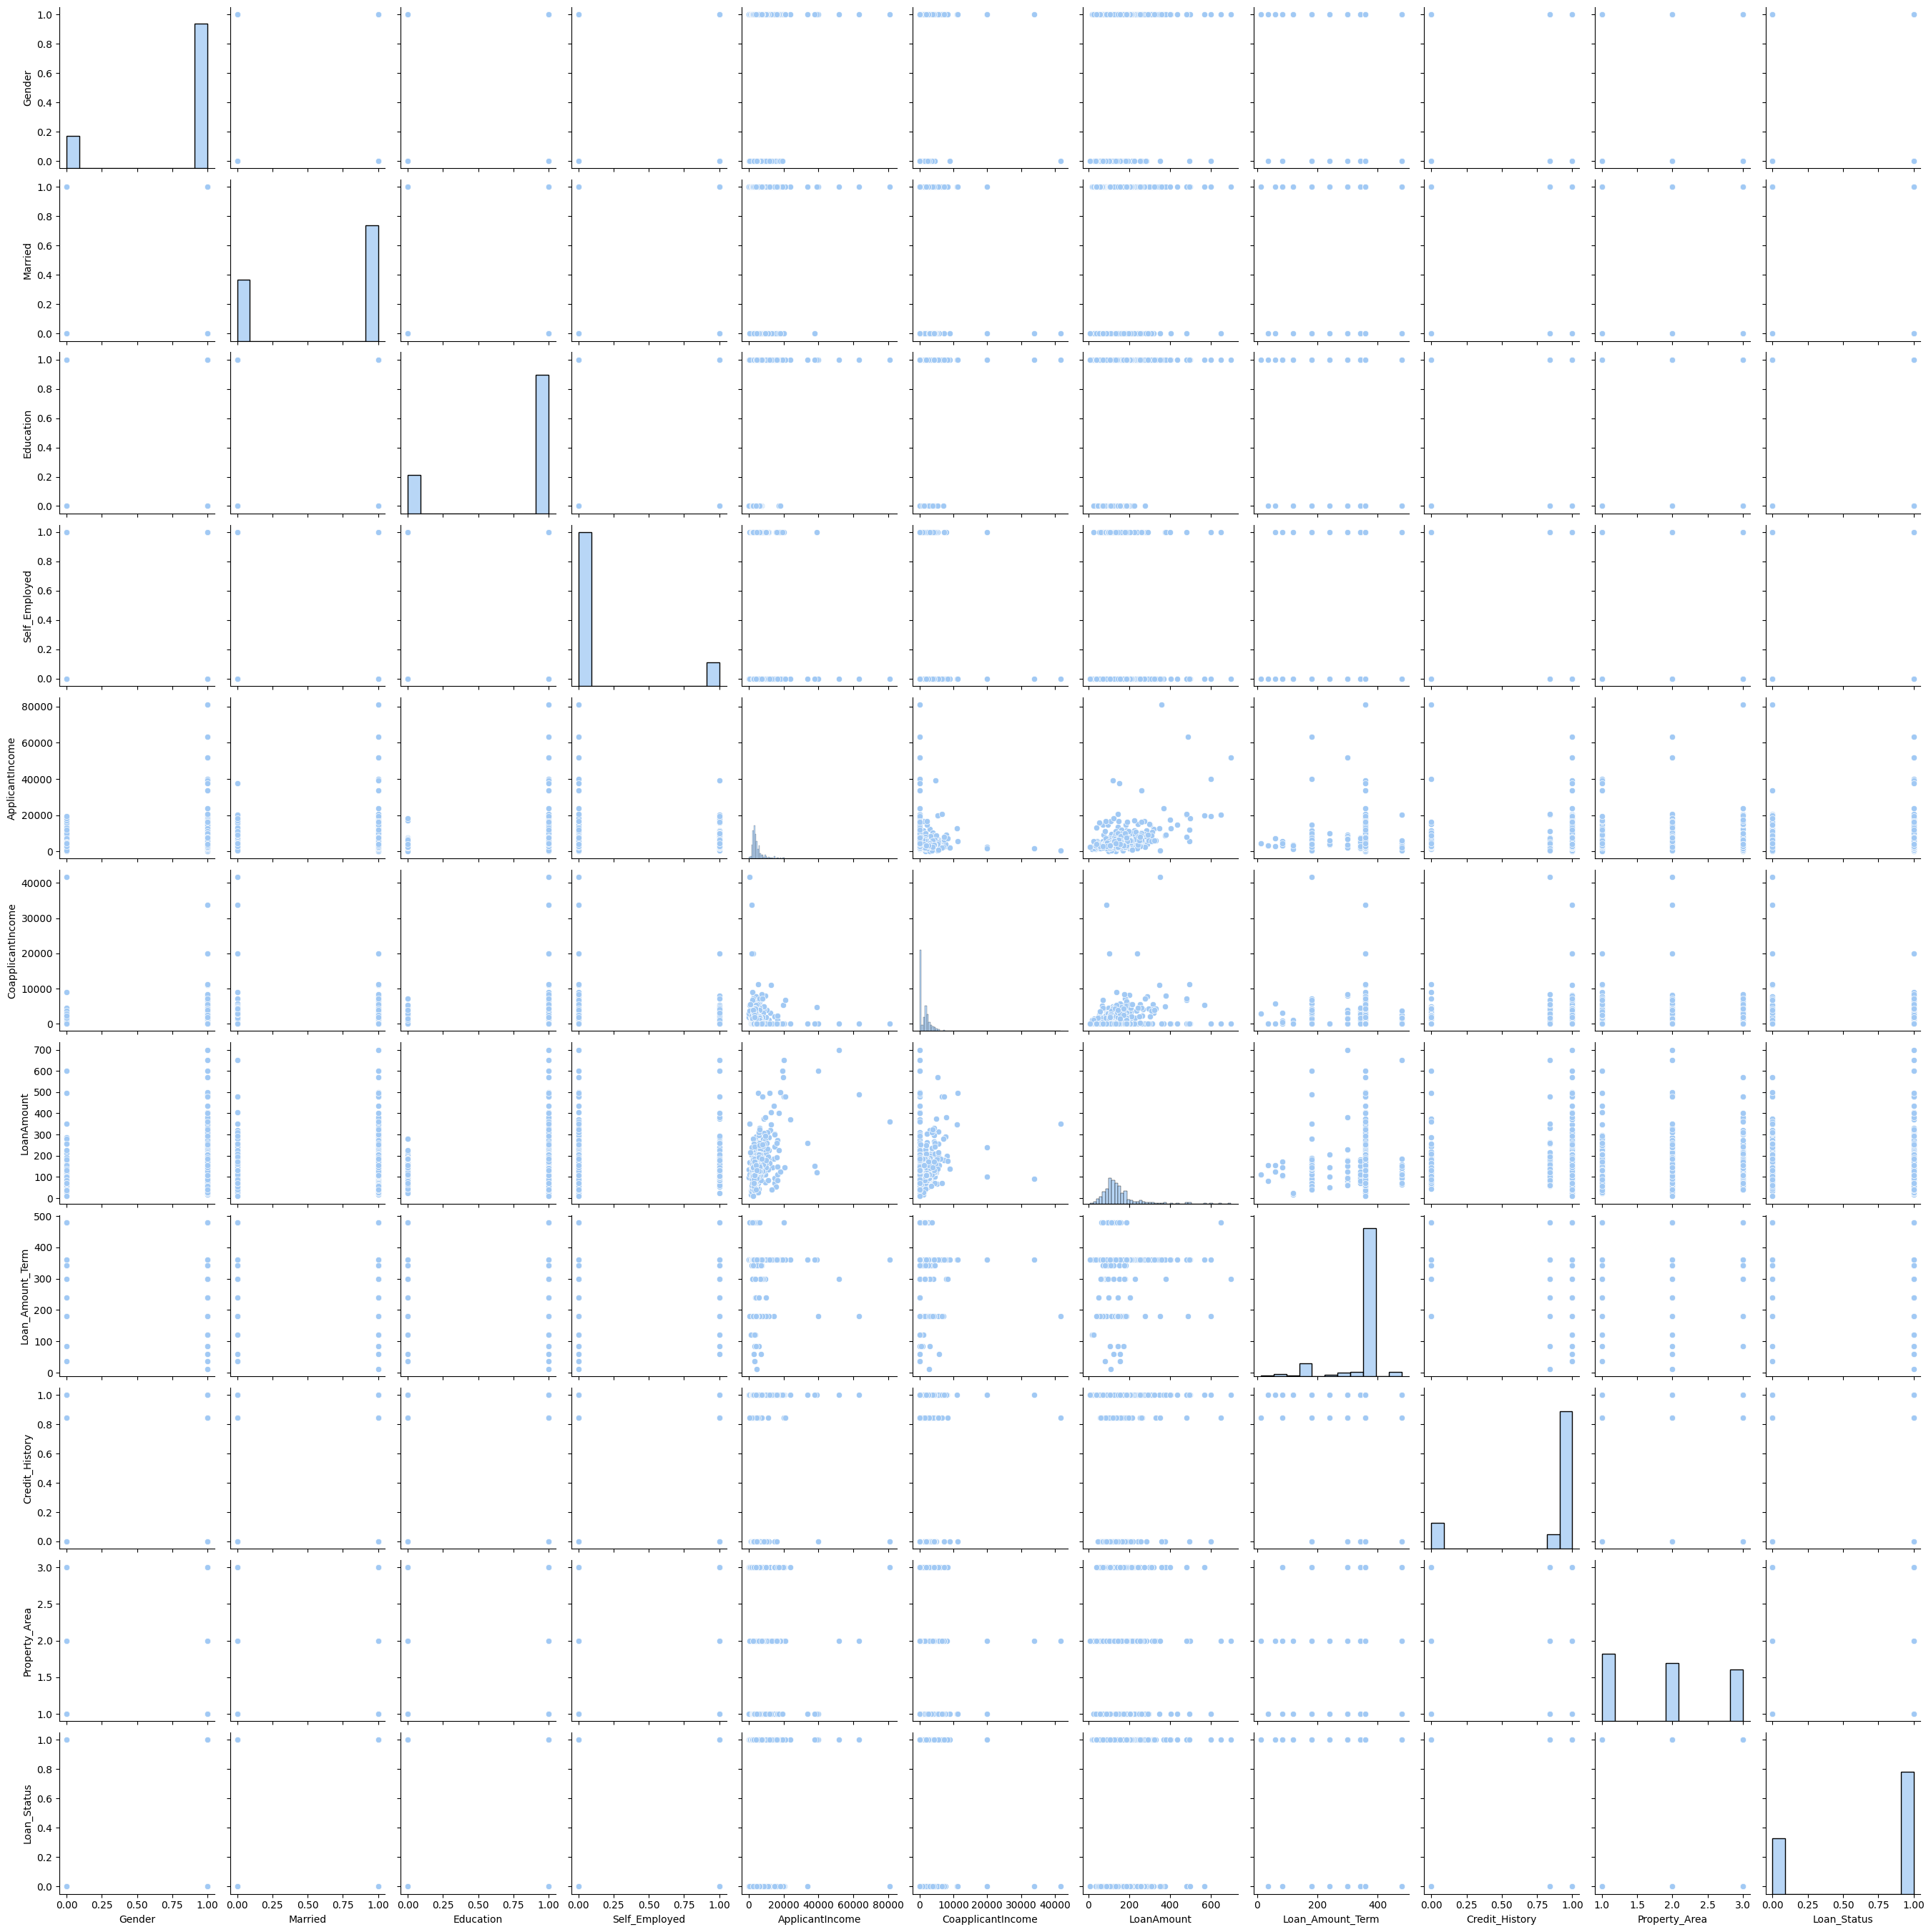

In [ ]:
sns.pairplot(loan_status)

plt.show()

#### Chart - 13

### **Heatmap**

<ipython-input-27-873a9fba6383>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = correlation_data.corr()


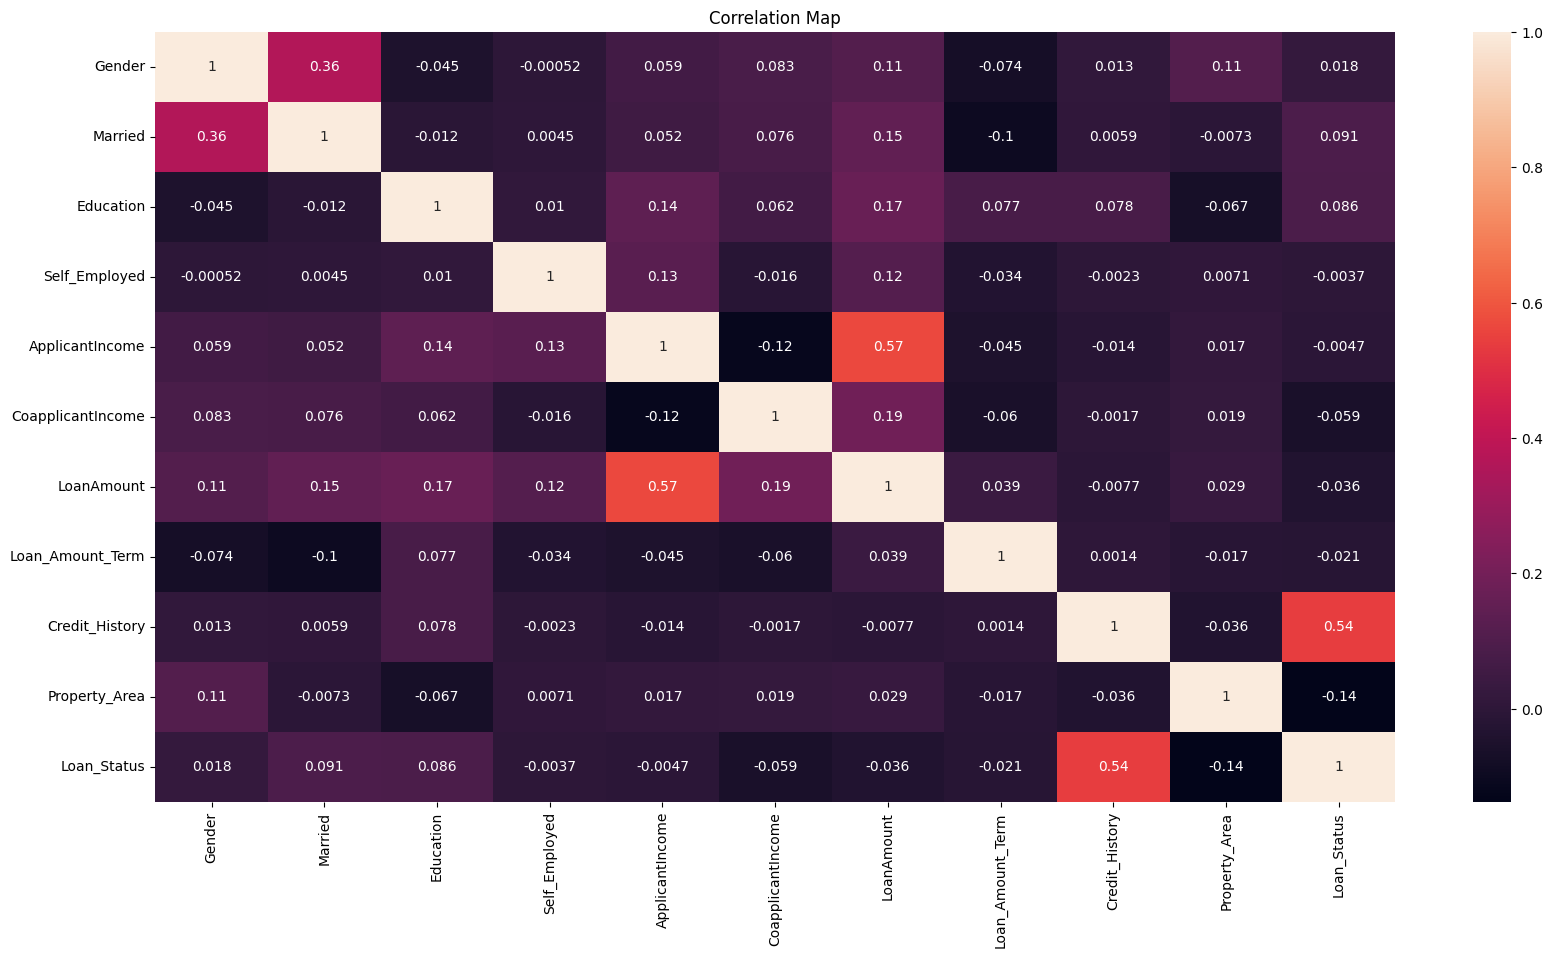

In [ ]:
correlation_data = loan_status

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(20,10))

sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Map')
plt.show()

**Will Check for VIF**

In [ ]:
x = loan_status.drop(columns=['Loan_ID','Loan_Status'])
y = loan_status['Loan_Status']

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

scalar = StandardScaler()
x_scaled=scalar.fit_transform(x)

# VIF

vif = pd.DataFrame()

vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif['features'] = x.columns

vif

,vif,features
0,1.184953,Gender
1,1.284313,Married
2,1.164312,Dependents
3,1.062540,Education
4,1.022863,Self_Employed
5,1.630601,ApplicantIncome
6,1.140708,CoapplicantIncome
7,1.707168,LoanAmount
8,1.043082,Loan_Amount_Term
9,1.009641,Credit_History


## **From above Heatmap and VIF we can observe that there is no any strong connection with varaibles.Seems like no any varibales are in linear relation.**

### ML Model - 1

#### Using all Variables for ML Model-1

In [ ]:
# Importing Necessary Libraries

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
# For ML Model 1 Using all variables from dataset

x = loan_status[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]

y = loan_status['Loan_Status']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=348)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting Logistic Regression model to dataset

logistic_reg = LogisticRegression()

logistic_reg.fit(x_train,y_train)

# Make predictions on the test set
y_pred = logistic_reg.predict(x_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy For ML Model 1:", accuracy)
print("Confusion Matrix For ML Model 1:\n", confusion)
print("Classification Report for ML Model 1:\n", classification_report_str)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'solver': ['liblinear', 'lbfgs'],  # Solver for optimization
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logistic_reg, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to your training data
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test_scaled)

# Evaluate the model with the best hyperparameters
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the best hyperparameters, best model, and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)
print("Accuracy For ML Model 1(with Hyperparameter Tuning):", accuracy)
print("Confusion Matrix For ML Model 1(with Hyperparameter Tuning):\n", confusion)
print("Classification Report for ML Model 1(with Hyperparameter Tuning):\n", classification_report_str)

Accuracy For ML Model 1: 0.8181818181818182
Confusion Matrix For ML Model 1:
 [[ 12  27]
 [  1 114]]
Classification Report for ML Model 1:
               precision    recall  f1-score   support

           0       0.92      0.31      0.46        39
           1       0.81      0.99      0.89       115

    accuracy                           0.82       154
   macro avg       0.87      0.65      0.68       154
weighted avg       0.84      0.82      0.78       154

Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Model: LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
Accuracy For ML Model 1(with Hyperparameter Tuning): 0.8181818181818182
Confusion Matrix For ML Model 1(with Hyperparameter Tuning):
 [[ 12  27]
 [  1 114]]
Classification Report for ML Model 1(with Hyperparameter Tuning):
               precision    recall  f1-score   support

           0       0.92      0.31      0.46        39
           1       0.81      0.99      0.89       115



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

**Insigts from the ML Model 1 :**


*  **Accuracy: 81.82%** - The model correctly predicts the target class about 82% of the time.
*   **Precision:**
    
    Class 0 precision: 92% - Of the instances predicted as class 0, 92% were actually class 0.
     
    Class 1 precision: 81% - Of the instances predicted as class 1, 81% were actually class 1.
*   **Recall (Sensitivity):**

    Class 0 recall: 31% - The model identified 31% of the actual class 0 instances.

    Class 1 recall: 99% - The model identified 99% of the actual class 1 instances.
*   **F1-score:**

    Class 0 F1-score: 46% - The harmonic mean of precision and recall for class 0.

    Class 1 F1-score: 89% - The harmonic mean of precision and recall for class 1.

**After Hyperparameter Tuning no change in metrics**

*   Best Hyperparameters: C=0.1, penalty='l1', solver='liblinear'.


**The model, both before and after tuning, exhibits high precision and recall for class 1, indicating it effectively predicts this class. However, its performance in identifying class 0 instances is weaker, as seen in the lower recall and F1-score for class 0.**



## **Feature Engineering**

**From Above VIF result and heatmap, no any positive correlation, by using domain knowledge selecting features for ML Model**

**Considering the features' importance for a machine learning model,potentially impactful features & reasons are:**

1.  **Credit_History**: Likely the most critical feature as it significantly influences loan approvals.
2.  **ApplicantIncome**: Directly impacts the individual's financial capacity to repay the loan.
3.  **CoapplicantIncome**: Complements the applicant's income, affecting the total household income available for loan repayment.
4.  **LoanAmount**: The amount requested, an essential factor in determining the risk associated with the loan.

5.  **Loan_Amount_Term**: Duration of the loan, influencing the repayment schedule.
6.  **Property_Area**: Provides insights into the borrower's financial stability and the purpose of the loan.

### ML Model - 2

#### Using all Variables for ML Model-2

In [ ]:
# For ML Model 1 Using all variables from dataset

x = loan_status[['Credit_History','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term','Property_Area']]

y = loan_status['Loan_Status']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=348)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting Logistic Regression model to dataset

logistic_reg = LogisticRegression()

logistic_reg.fit(x_train,y_train)

# Make predictions on the test set
y_pred = logistic_reg.predict(x_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy For ML Model 2:", accuracy)
print("Confusion Matrix For ML Model 2:\n", confusion)
print("Classification Report for ML Model 2:\n", classification_report_str)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'solver': ['liblinear', 'lbfgs'],  # Solver for optimization
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logistic_reg, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to your training data
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test_scaled)

# Evaluate the model with the best hyperparameters
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the best hyperparameters, best model, and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)
print("Accuracy For ML Model 2(with Hyperparameter Tuning):", accuracy)
print("Confusion Matrix For ML Model 2(with Hyperparameter Tuning):\n", confusion)
print("Classification Report for ML Model 2(with Hyperparameter Tuning):\n", classification_report_str)

Accuracy For ML Model 2: 0.8181818181818182
Confusion Matrix For ML Model 2:
 [[ 12  27]
 [  1 114]]
Classification Report for ML Model 2:
               precision    recall  f1-score   support

           0       0.92      0.31      0.46        39
           1       0.81      0.99      0.89       115

    accuracy                           0.82       154
   macro avg       0.87      0.65      0.68       154
weighted avg       0.84      0.82      0.78       154

Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Model: LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
Accuracy For ML Model 2(with Hyperparameter Tuning): 0.8181818181818182
Confusion Matrix For ML Model 2(with Hyperparameter Tuning):
 [[ 12  27]
 [  1 114]]
Classification Report for ML Model 2(with Hyperparameter Tuning):
               precision    recall  f1-score   support

           0       0.92      0.31      0.46        39
           1       0.81      0.99      0.89       115



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

**Insigts from the ML Model 2 :**


*  **Accuracy: 81.82%** - The model achieved an accuracy of 81.82% on the given dataset.
*  **Confusion Matrix**:

    True Positives (TP): 114,
    True Negatives (TN): 12,
    False Positives (FP): 27,
    False Negatives (FN): 1.

*   **Precision:**
    
    Class 0 (0.92): High precision for predicting 0, but recall is low.
     
    Class 1 (0.81): Slightly lower precision compared to class 0 but higher recall.
*   **Recall (Sensitivity):**

    Class 0 (0.31): Low recall for predicting 0.

    Class 1 (0.99): High recall for predicting 1.
*   **F1-score:**

    Class 0 (0.46): Low F1-score due to low recall and precision.

    Class 1 (0.89): High F1-score due to high precision and recall.

**After Hyperparameter Tuning no change in metrics**

*  **Accuracy**: The accuracy remains the same as before hyperparameter tuning (81.82%).

*  **Classification Report**:
No change observed in precision, recall, or F1-scores after hyperparameter tuning.



**The model's overall accuracy remained the same after hyperparameter tuning.The distribution of true positives, true negatives, false positives, and false negatives remained unchanged.Precision, recall, and F1-scores for both classes (0 and 1) remained the same before and after hyperparameter tuning. The model's performance on predicting each class didn't improve with the applied hyperparameter changes.**



## **Will check for outliers in each column using boxplot**

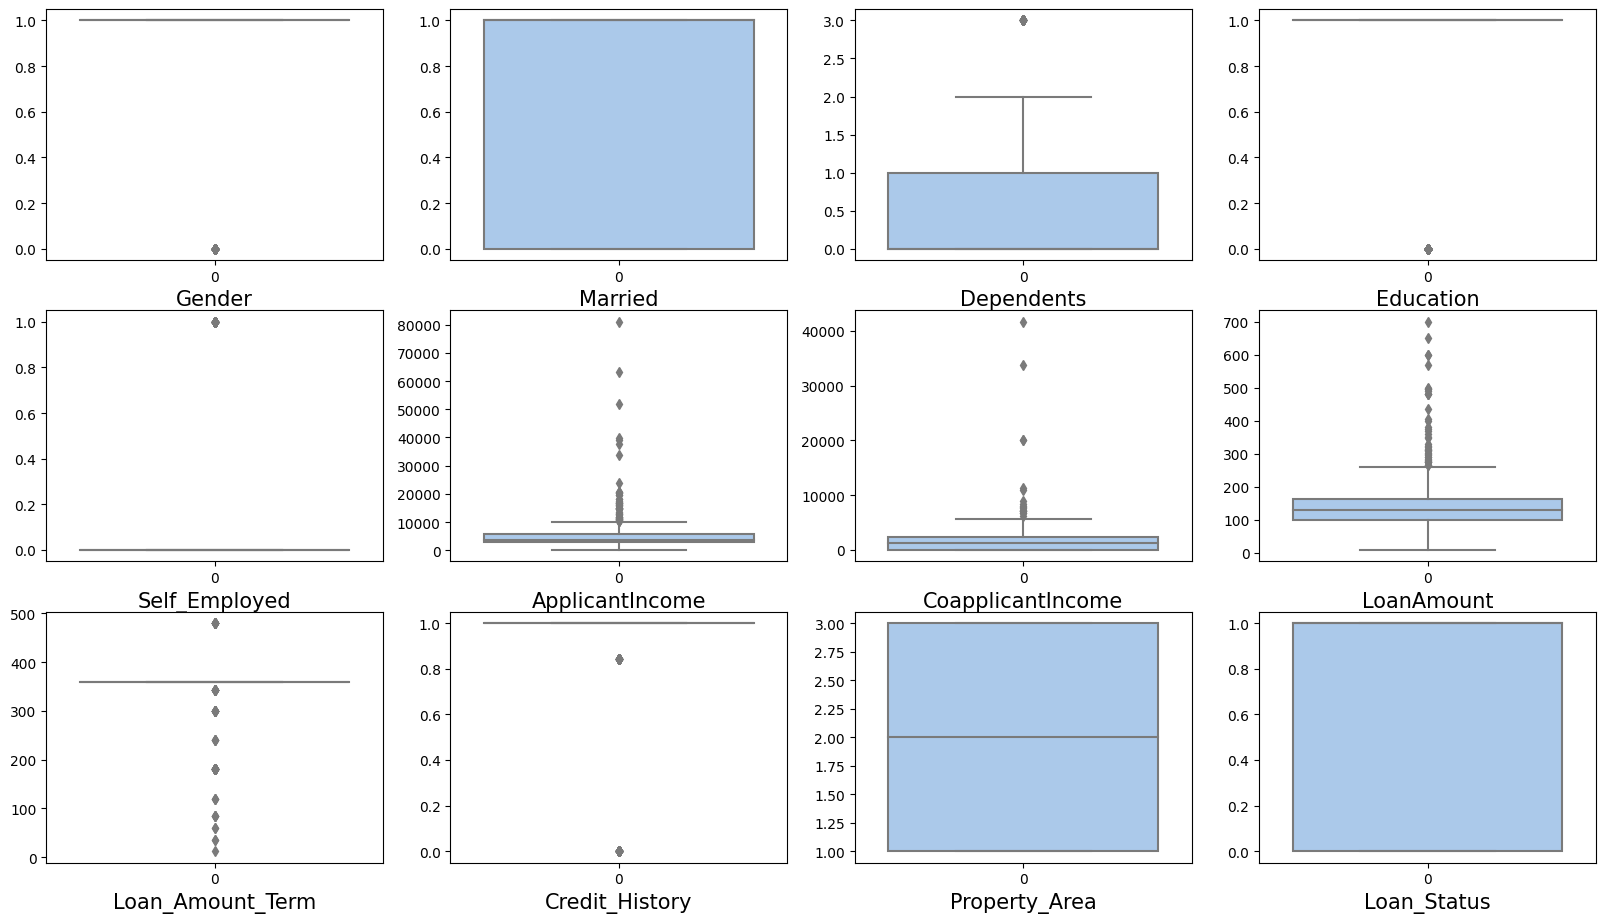

In [ ]:
x = loan_status.drop(columns=['Loan_ID'])


plt.figure(figsize=(20,15))
graph = 1

for column in x:
  if graph<=16:
    plt.subplot(4,4,graph)
    ax=sns.boxplot(data= x[column])
    plt.xlabel(column,fontsize=15)
  graph+=1
plt.show()

<ipython-input-40-ce793b6043b2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_status["LoanAmount"], ax=axes[0][0])
<ipython-input-40-ce793b6043b2>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_status["ApplicantIncome"], ax=axes[1][0])
<ipython-input-40-ce793b6043b2>:15: UserWarn

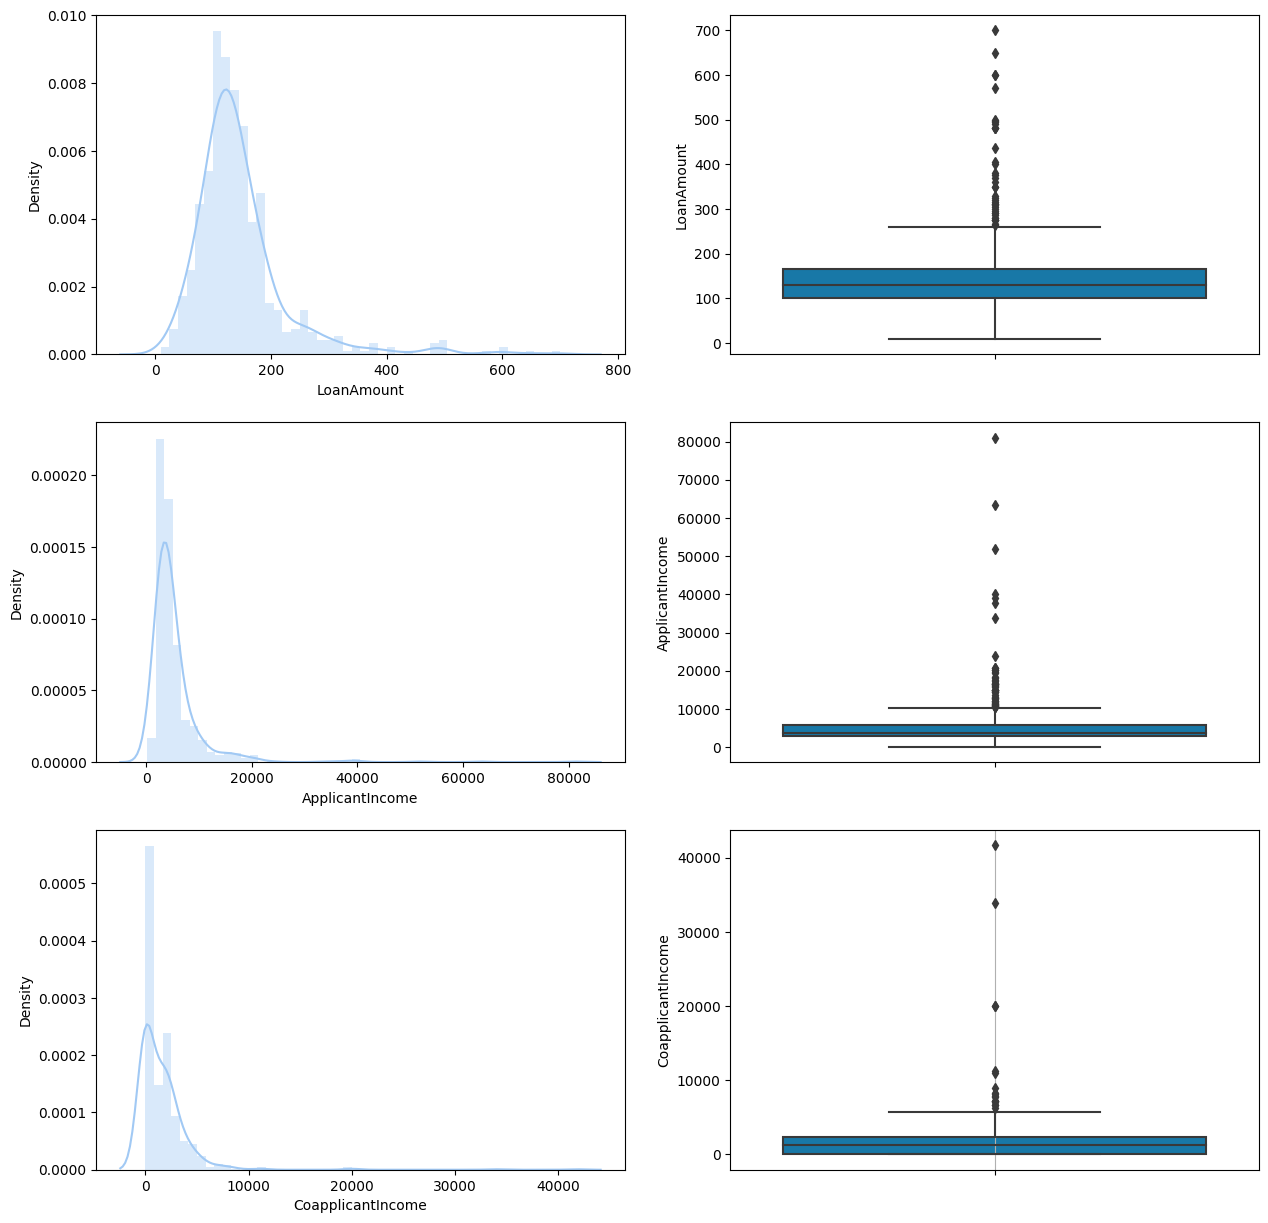

In [ ]:
# plotting distribution plot and boxplot for

f, axes = plt.subplots(3, 2, figsize=(15,15))

sns.distplot(loan_status["LoanAmount"], ax=axes[0][0])
plt.grid()
sns.boxplot( y="LoanAmount", data=loan_status, palette = "winter", ax = axes[0][1])
plt.grid()

sns.distplot(loan_status["ApplicantIncome"], ax=axes[1][0])
plt.grid()
sns.boxplot( y="ApplicantIncome", data=loan_status, palette = "winter", ax = axes[1][1])
plt.grid()

sns.distplot(loan_status["CoapplicantIncome"], ax=axes[2][0])
plt.grid()
sns.boxplot( y="CoapplicantIncome", data=loan_status, palette = "winter", ax = axes[2][1])
plt.grid()

### will use Median Absolute Deviation or MAD to handle the outliers

In [ ]:
# handling outliers with MAD

# Handling 'ApplicantIncome' column
mad=1.4826*np.median(np.abs(loan_status.ApplicantIncome-loan_status.ApplicantIncome.median()))
size_outlr_mad=loan_status.ApplicantIncome
size_outlr_mad[((loan_status.ApplicantIncome-loan_status.ApplicantIncome.median()).abs()>3*mad)]=loan_status.ApplicantIncome.median()
print("ApplicantIncome MAD :\n",size_outlr_mad.median())

# Handling 'CoapplicantIncome' column
mad=1.4826*np.median(np.abs(loan_status.CoapplicantIncome-loan_status.CoapplicantIncome.median()))
size_outlr_mad=loan_status.CoapplicantIncome
size_outlr_mad[((loan_status.CoapplicantIncome-loan_status.CoapplicantIncome.median()).abs()>3*mad)]=loan_status.CoapplicantIncome.median()
print("CoapplicantIncome MAD :\n",size_outlr_mad.median())

# Handling 'LoanAmount' column
mad=1.4826*np.median(np.abs(loan_status.LoanAmount-loan_status.LoanAmount.median()))
size_outlr_mad=loan_status.LoanAmount
size_outlr_mad[((loan_status.LoanAmount-loan_status.LoanAmount.median()).abs()>3*mad)]=loan_status.LoanAmount.median()
print("LoanAmount MAD :\n",size_outlr_mad.median())

ApplicantIncome MAD :
 3812.25
CoapplicantIncome MAD :
 1177.75
LoanAmount MAD :
 129.0


<ipython-input-41-a3c85fd0d5d2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  size_outlr_mad[((loan_status.ApplicantIncome-loan_status.ApplicantIncome.median()).abs()>3*mad)]=loan_status.ApplicantIncome.median()
<ipython-input-41-a3c85fd0d5d2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  size_outlr_mad[((loan_status.CoapplicantIncome-loan_status.CoapplicantIncome.median()).abs()>3*mad)]=loan_status.CoapplicantIncome.median()
<ipython-input-41-a3c85fd0d5d2>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

<ipython-input-43-3608a95f7777>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_status["LoanAmount"], ax=axes[0][0]).set_title("Before")
<ipython-input-43-3608a95f7777>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_status["LoanAmount"], ax=axes[0][1]).set_title("After")
<ipython-in

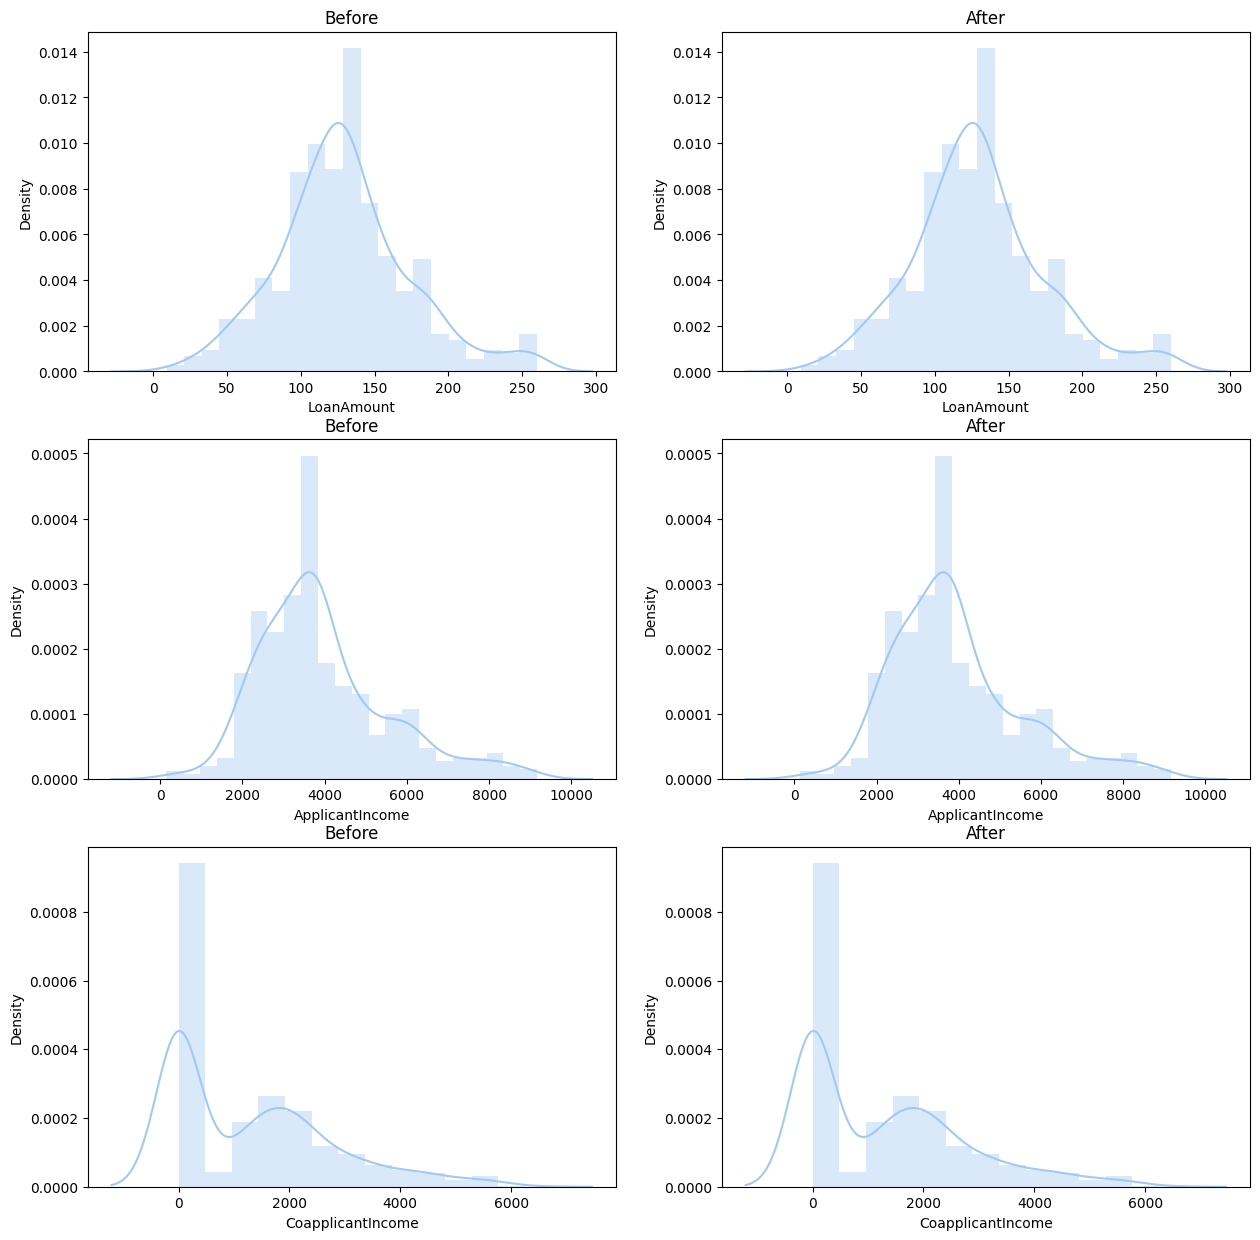

In [ ]:
# comparing distribution plots of dataset before and after handling outliers

f, axes = plt.subplots(3, 2, figsize=(15,15))

sns.distplot(loan_status["LoanAmount"], ax=axes[0][0]).set_title("Before")
plt.grid()
sns.distplot(loan_status["LoanAmount"], ax=axes[0][1]).set_title("After")
plt.grid()

sns.distplot(loan_status["ApplicantIncome"], ax=axes[1][0]).set_title("Before")
plt.grid()
sns.distplot(loan_status["ApplicantIncome"], ax=axes[1][1]).set_title("After")
plt.grid()

sns.distplot(loan_status["CoapplicantIncome"], ax=axes[2][0]).set_title("Before")
plt.grid()
sns.distplot(loan_status["CoapplicantIncome"], ax=axes[2][1]).set_title("After")
plt.grid()
f.savefig('oldnewcompa.png')

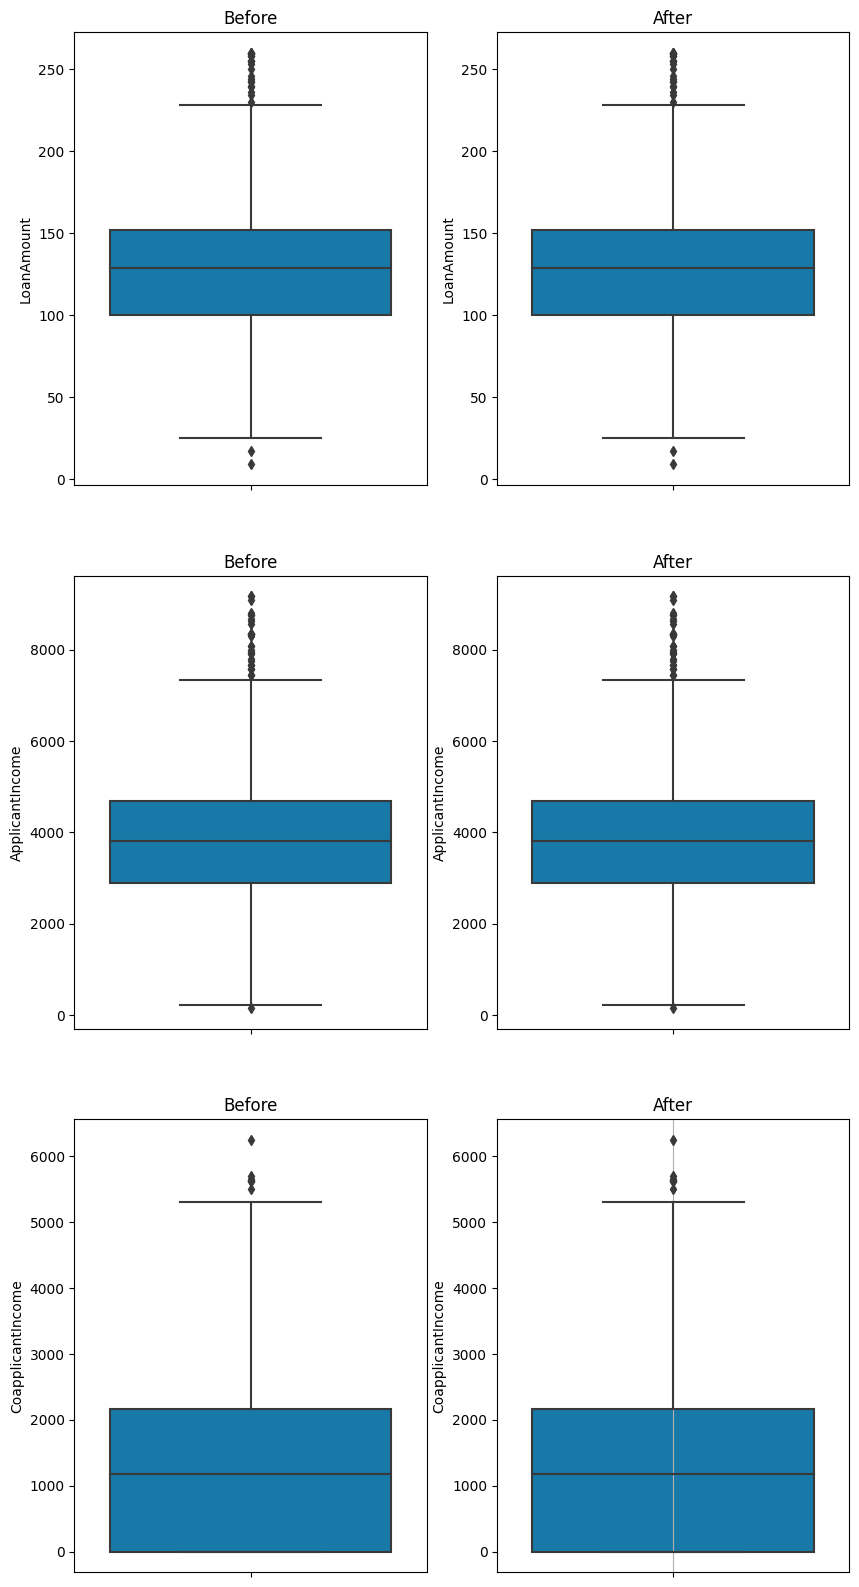

In [ ]:
# comparing boxplots plots of dataset before and after handling outliers

f, axes = plt.subplots(3, 2, figsize=(10, 20))

sns.boxplot( y="LoanAmount", data=loan_status, palette = "winter", ax = axes[0][0]).set_title("Before")
plt.grid()
sns.boxplot( y="LoanAmount", data=loan_status, palette = "winter", ax = axes[0][1]).set_title("After")
plt.grid()

sns.boxplot( y="ApplicantIncome", data=loan_status, palette = "winter", ax = axes[1][0]).set_title("Before")
plt.grid()
sns.boxplot( y="ApplicantIncome", data=loan_status, palette = "winter", ax = axes[1][1]).set_title("After")
plt.grid()

sns.boxplot( y="CoapplicantIncome", data=loan_status, palette = "winter", ax = axes[2][0]).set_title("Before")
plt.grid()
sns.boxplot( y="CoapplicantIncome", data=loan_status, palette = "winter", ax = axes[2][1]).set_title("After")
plt.grid()
f.savefig("boxafterbefore.png")

In [ ]:
loan_status["Dependents"] = loan_status["Dependents"].astype(str).astype(int)

In [ ]:
loan_status.shape

(614, 13)

In [ ]:
from scipy import stats

# Define a threshold for the Z-score
z_score_threshold = 2.5  # You can adjust this threshold based on your data and requirements

# Select numerical columns where you want to detect and treat outliers
numerical_cols = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

# Create a copy of the dataset for outlier treatment
no_outliers = loan_status.copy()

# Loop through each numerical column and detect and remove outliers
for col in numerical_cols:
    z_scores = stats.zscore(no_outliers[col])
    no_outliers = no_outliers[(z_scores < z_score_threshold) & (z_scores > -z_score_threshold)]

# Display the shape of the dataset after removing outliers
print("Shape of data after outlier removal:", no_outliers.shape)

Shape of data after outlier removal: (443, 13)


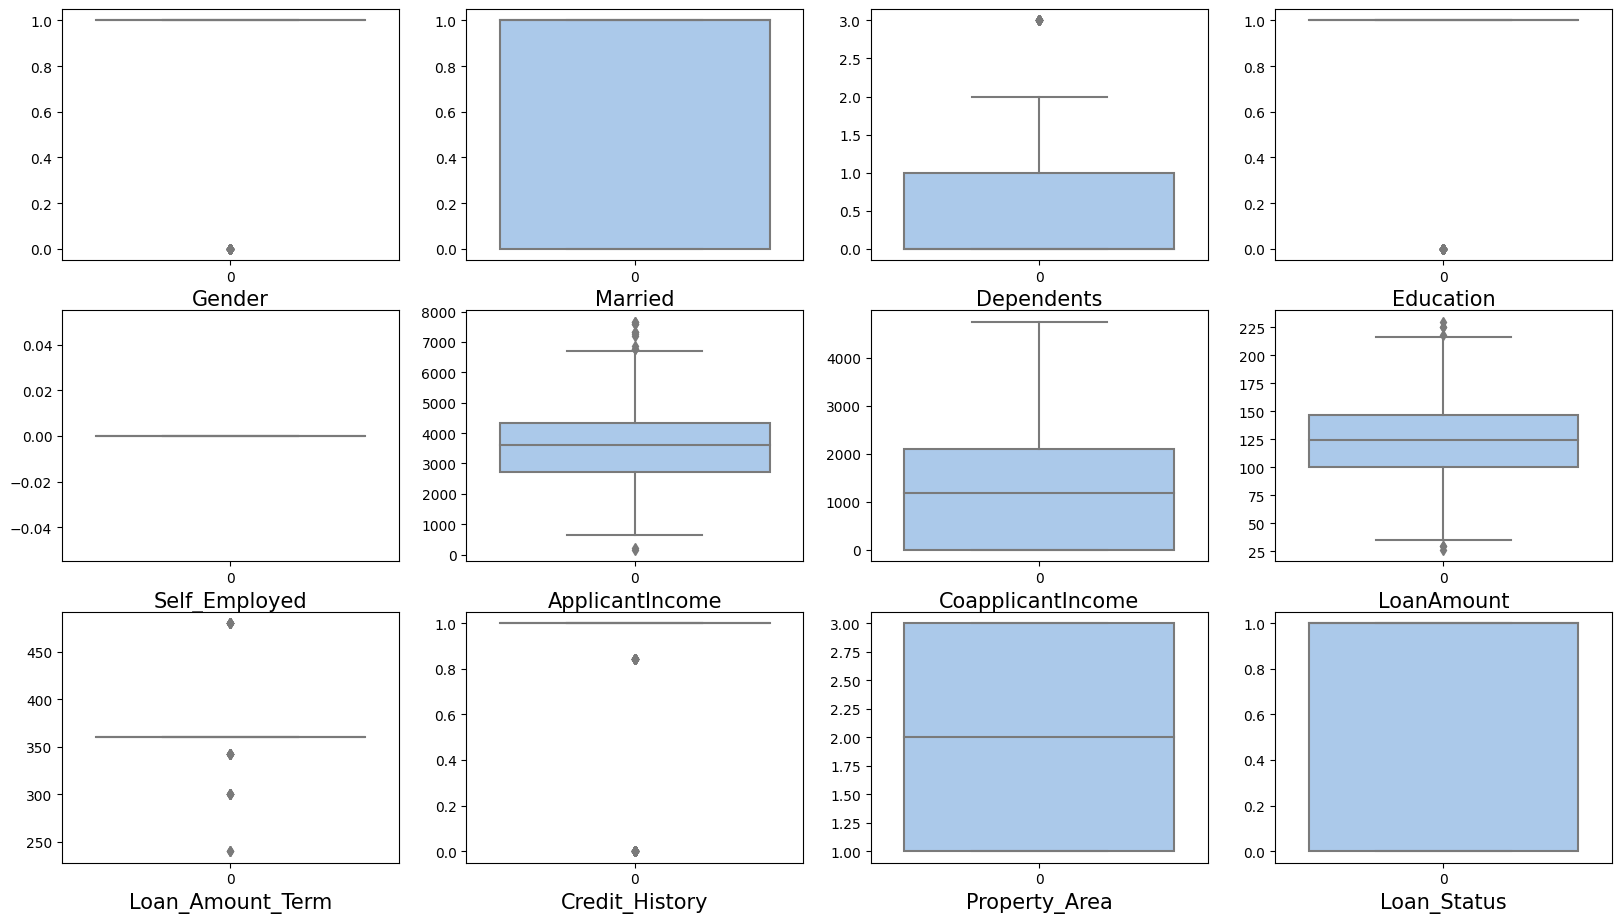

In [ ]:
x = no_outliers.drop(columns=['Loan_ID'])


plt.figure(figsize=(20,15))
graph = 1

for column in x:
  if graph<=16:
    plt.subplot(4,4,graph)
    ax=sns.boxplot(data= x[column])
    plt.xlabel(column,fontsize=15)
  graph+=1
plt.show()

### ML Model - 3

#### After Treating outliers

In [ ]:
# For ML Model 1 Using all variables from dataset

x = no_outliers[['Married','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Credit_History', 'Property_Area']]

y = no_outliers['Loan_Status']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=348)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting Logistic Regression model to dataset

logistic_reg = LogisticRegression()

logistic_reg.fit(x_train,y_train)

# Make predictions on the test set
y_pred = logistic_reg.predict(x_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy For ML Model 3:", accuracy)
print("Confusion Matrix For ML Model 3:\n", confusion)
print("Classification Report for ML Model 3:\n", classification_report_str)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'solver': ['liblinear', 'lbfgs'],  # Solver for optimization
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logistic_reg, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to your training data
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test_scaled)

# Evaluate the model with the best hyperparameters
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the best hyperparameters, best model, and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)
print("Accuracy For ML Model 3(with Hyperparameter Tuning):", accuracy)
print("Confusion Matrix For ML Model 3(with Hyperparameter Tuning):\n", confusion)
print("Classification Report for ML Model 3(with Hyperparameter Tuning):\n", classification_report_str)

Accuracy For ML Model 3: 0.8018018018018018
Confusion Matrix For ML Model 3:
 [[17 20]
 [ 2 72]]
Classification Report for ML Model 3:
               precision    recall  f1-score   support

           0       0.89      0.46      0.61        37
           1       0.78      0.97      0.87        74

    accuracy                           0.80       111
   macro avg       0.84      0.72      0.74       111
weighted avg       0.82      0.80      0.78       111

Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Model: LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
Accuracy For ML Model 3(with Hyperparameter Tuning): 0.8018018018018018
Confusion Matrix For ML Model 3(with Hyperparameter Tuning):
 [[17 20]
 [ 2 72]]
Classification Report for ML Model 3(with Hyperparameter Tuning):
               precision    recall  f1-score   support

           0       0.89      0.46      0.61        37
           1       0.78      0.97      0.87        74

    accu

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

**Insigts from the ML Model 3 :**


*  **Accuracy: 81.82%** - The model had an accuracy of 0.8018, indicating that it correctly predicted around 80% of the outcomes.
*  **Confusion Matrix**:

    There were 17 true negatives (predicted as 0 and actually 0) and 72 true positives (predicted as 1 and actually 1).
    
    It misclassified 20 instances of 0 as 1 and 2 instances of 1 as 0.

*   **Precision:**
    
    Precision for class 0 (0.89) was high, meaning when the model predicted an instance as 0, it was correct 89% of the time.

    Recall for class 0 (0.46) was relatively low, indicating that the model only captured 46% of the actual instances of class 0.
     
    Precision and recall for class 1 (0.78 and 0.97, respectively) were better, showing a high proportion of correct predictions and capturing most instances of class 1.


**The hyperparameters tuned were C=0.1, penalty='l1', and solver='liblinear'.**

**Accuracy remained the same at 0.8018, indicating that hyperparameter tuning did not significantly change the overall accuracy.**

**The model's performance, as measured by accuracy and other metrics, remained the same before and after hyperparameter tuning.**



### ML Model - 3

#### Decision Tree Model

In [ ]:
# Importing decision tree classifier

from sklearn.tree import DecisionTreeClassifier

# For ML Model 3, using selected variable from previous model which gives more accuracy.

x = no_outliers[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]

y = no_outliers['Loan_Status']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=348)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting Logistic Regression model to dataset

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(x_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy For Decision Tree Model:", accuracy)
print("Confusion Matrix Decision Tree Model:\n", confusion)
print("Classification Report Decision Tree Model:\n", classification_report_str)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the hyperparameter grid

param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': range(10,15),
    'min_samples_leaf': range(2,6),
    'min_samples_split': range(3,8),
    'max_leaf_nodes': range(5,10)
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to your training data
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test_scaled)

# Evaluate the model with the best hyperparameters
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the best hyperparameters, best model, and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)
print("Accuracy For Decision Tree Model (with Hyperparameter Tuning):", accuracy)
print("Confusion Matrix For Decision Tree Model (with Hyperparameter Tuning):\n", confusion)
print("Classification Report for Decision Tree Model (with Hyperparameter Tuning):\n", classification_report_str)

Accuracy For Decision Tree Model: 0.7477477477477478
Confusion Matrix Decision Tree Model:
 [[25 12]
 [16 58]]
Classification Report Decision Tree Model:
               precision    recall  f1-score   support

           0       0.61      0.68      0.64        37
           1       0.83      0.78      0.81        74

    accuracy                           0.75       111
   macro avg       0.72      0.73      0.72       111
weighted avg       0.76      0.75      0.75       111

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 5, 'min_samples_leaf': 2, 'min_samples_split': 3}
Best Model: DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=5,
                       min_samples_leaf=2, min_samples_split=3)
Accuracy For Decision Tree Model (with Hyperparameter Tuning): 0.8018018018018018
Confusion Matrix For Decision Tree Model (with Hyperparameter Tuning):
 [[17 20]
 [ 2 72]]
Classification Report for Decision Tree Model (with Hyperpara

**Insigts from the Decision Tree Model :**


*  **Accuracy: 74.77%**

*  **Confusion Matrix**:

    True Positives (TP): 58,

    True Negatives (TN): 25,

    False Positives (FP): 12,

    False Negatives (FN): 16.

*   **Precision:**
    
    Precision for class 0 (0.61) and class 1 (0.83) varied.

    Recall (sensitivity) for class 0 (0.68) and class 1 (0.78) showed a moderate performance.
     
    F1-score for class 0 (0.64) and class 1 (0.81) - a blend of precision and recall - indicates moderate performance.


### **After Hyperparameter Tuning**

*  **Accuracy: 80.18%,A significant improvement from the untuned model.**

*  **Confusion Matrix**:

    Better balance in predictions with increased True Positives (72) and True Negatives (17).

    Reduced False Positives (20) and False Negatives (2).


*   **Classification Report**:

    Precision for class 0 (0.89) and class 1 (0.78) improved.

    Recall for class 0 (0.46) decreased while significantly increasing for class 1 (0.97).

    F1-score for class 0 (0.61) increased moderately, and significantly for class 1 (0.87).


**Hyperparameter tuning significantly enhanced the model's overall accuracy.After tuning, the model showed a better balance in predicting both classes, reducing the bias towards one class.Precision and recall values were more balanced after tuning, especially for class 0, resulting in fewer false positives and false negatives.F1-score improved for both classes, indicating a better balance between precision and recall after hyperparameter tuning.**

### ML Model - 4

#### RandomForestClassifier

In [ ]:
# Importing decision tree classifier

from sklearn.tree import DecisionTreeClassifier

# For ML Model RandomForestClassifier, using selected variable from previous model which gives more accuracy.

x = no_outliers[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]

y = no_outliers['Loan_Status']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=348)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting RandomForest model, first will import from sklearn package

from sklearn.ensemble import RandomForestClassifier

random_for = RandomForestClassifier()

random_for.fit(x_train,y_train)

# Make predictions on the test set
y_pred = random_for.predict(x_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy For RandomForestClassifier:", accuracy)
print("Confusion Matrix RandomForestClassifier:\n", confusion)
print("Classification Report RandomForestClassifier:\n", classification_report_str)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the hyperparameter grid

param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': range(10,15),
    'min_samples_leaf': range(2,6),
    'min_samples_split': range(3,8),
    'max_leaf_nodes': range(5,10)
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random_for, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to your training data
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test_scaled)

# Evaluate the model with the best hyperparameters
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the best hyperparameters, best model, and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)
print("Accuracy For RandomForestClassifier (with Hyperparameter Tuning):", accuracy)
print("Confusion Matrix For RandomForestClassifier (with Hyperparameter Tuning):\n", confusion)
print("Classification Report for RandomForestClassifier (with Hyperparameter Tuning):\n", classification_report_str)

Accuracy For RandomForestClassifier: 0.7747747747747747
Confusion Matrix RandomForestClassifier:
 [[19 18]
 [ 7 67]]
Classification Report RandomForestClassifier:
               precision    recall  f1-score   support

           0       0.73      0.51      0.60        37
           1       0.79      0.91      0.84        74

    accuracy                           0.77       111
   macro avg       0.76      0.71      0.72       111
weighted avg       0.77      0.77      0.76       111

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 12, 'max_leaf_nodes': 8, 'min_samples_leaf': 4, 'min_samples_split': 4}
Best Model: RandomForestClassifier(max_depth=12, max_leaf_nodes=8, min_samples_leaf=4,
                       min_samples_split=4)
Accuracy For RandomForestClassifier (with Hyperparameter Tuning): 0.8018018018018018
Confusion Matrix For RandomForestClassifier (with Hyperparameter Tuning):
 [[17 20]
 [ 2 72]]
Classification Report for RandomForestClassifier (with Hyperparameter 

**Insigts from the RandomForestClassifier  :**


*  **Accuracy**: The initial model achieved an accuracy of **77.48%.**

*  **Confusion Matrix**:

    It showed 19 true negatives, 18 false positives, 7 false negatives, and 67 true positives.

*   **Precision:**
    
    Precision for class 0 (0.73) and class 1 (0.79) shows the accuracy of positive predictions.

    Recall for class 0 (0.51) and class 1 (0.91) indicates the coverage of actual positive instances.
     
    F1-score balances precision and recall, providing insight into the model's overall performance.


### **After Hyperparameter Tuning**

*  **Accuracy**: After tuning, the model's accuracy increased to **80.18%.**

*  **Confusion Matrix**:

    17 true negatives, 20 false positives, 2 false negatives, and 72 true positives.

*   **Classification Report**:

    Precision for class 0 (0.89) and class 1 (0.78) showed substantial improvements, especially for class 0.

    Recall for class 0 (0.46) and class 1 (0.97) varied, indicating changes in correctly predicting positive instances and leaving room for false negatives in class 0.

    F1-score for both classes increased, reflecting the overall balance between precision and recall.


**Hyperparameter tuning significantly improved the model's accuracy from 77.48% to 80.18%.**

### ML Model - 5

#### KNeighborsClassifier

In [ ]:
# Importing decision tree classifier

from sklearn.tree import DecisionTreeClassifier

# For ML Model 7,Using all KNeighborsClassifier

x = no_outliers[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]

y = no_outliers['Loan_Status']


# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=348)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting KNeighborsClassifier model, first will import from sklearn package

from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier()

kNN.fit(x_train,y_train)

# Make predictions on the test set
y_pred = kNN.predict(x_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy For KNeighborsClassifier:", accuracy)
print("Confusion Matrix for KNeighborsClassifier:\n", confusion)
print("Classification Report for KNeighborsClassifier:\n", classification_report_str)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the hyperparameter grid

param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=kNN, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to your training data
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test_scaled)

# Evaluate the model with the best hyperparameters
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the best hyperparameters, best model, and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)
print("Accuracy For KNeighborsClassifier (with Hyperparameter Tuning):", accuracy)
print("Confusion Matrix For KNeighborsClassifier (with Hyperparameter Tuning):\n", confusion)
print("Classification Report for KNeighborsClassifier (with Hyperparameter Tuning):\n", classification_report_str)

Accuracy For KNeighborsClassifier: 0.7657657657657657
Confusion Matrix for KNeighborsClassifier:
 [[17 20]
 [ 6 68]]
Classification Report for KNeighborsClassifier:
               precision    recall  f1-score   support

           0       0.74      0.46      0.57        37
           1       0.77      0.92      0.84        74

    accuracy                           0.77       111
   macro avg       0.76      0.69      0.70       111
weighted avg       0.76      0.77      0.75       111

Best Hyperparameters: {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Best Model: KNeighborsClassifier(n_neighbors=9)
Accuracy For KNeighborsClassifier (with Hyperparameter Tuning): 0.8018018018018018
Confusion Matrix For KNeighborsClassifier (with Hyperparameter Tuning):
 [[17 20]
 [ 2 72]]
Classification Report for KNeighborsClassifier (with Hyperparameter Tuning):
               precision    recall  f1-score   support

           0       0.89      0.46      0.61        37
           1       0.78   

**Insigts from the KNeighborsClassifier   :**


*  **Accuracy**: The the accuracy of the model was around **76.58%.**

*  **Confusion Matrix**:

    True Positives (TP): 68 (Predicted as 1 and actually 1),
    False Positives (FP): 20 (Predicted as 1 but actually 0),
    False Negatives (FN): 6 (Predicted as 0 but actually 1),
    True Negatives (TN): 17 (Predicted as 0 and actually 0),
    Higher number of false positives than false negatives.

*   **Precision:**
    
    Precision for class 0 (0.74) was lower than class 1 (0.77), meaning the model was better at identifying class 1 instances.

    Recall for class 0 (0.46) was significantly lower than class 1 (0.92), indicating the model missed many actual class 0 instances.
     
    F1-score for class 0 (0.57) was notably lower than class 1 (0.84), showing a lower overall performance for class 0.

**Best Hyperparameters: {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}**

### **After Hyperparameter Tuning**

*  **Accuracy**: The accuracy improved after tuning to approximately **80.18%.**

*  **Confusion Matrix**:

    Improved True Positives (TP): 72,
    Reduced False Positives (FP): 20,
    Reduced False Negatives (FN): 2,
    Unchanged True Negatives (TN): 17.

*   **Classification Report**:

    Precision for class 0 (0.89) significantly increased after tuning, showing a substantial improvement in correctly predicting class 0 instances.

    Recall for class 0 (0.46) remained almost the same, indicating a relatively similar rate of identifying actual class 0 instances as before.

    F1-score for class 0 (0.61) increased post-tuning but still remained lower compared to class 1 (0.87).


**The model's performance improved notably after tuning, especially in correctly identifying instances of class 0 (though recall remained a challenge).**

# **Conclusion:**

**Looking at the evaluation metrics, specifically focusing on the before and after hyperparameter tuning results, the KNeighborsClassifier appears to perform the best among the models assessed.Before tuning, the KNeighborsClassifier showed an accuracy of 76.58% with room for improvement in correctly identifying instances of class 0. After hyperparameter tuning, the accuracy improved to around 80.18%, and there was a significant enhancement in correctly predicting instances of class 0, although the recall for this class remained somewhat stagnant.**

# Will save tha model with name "Loan_application_Model"

In [ ]:
import pickle

# Save the model to a file
with open('Loan_application_Model.pkl', 'wb') as file:
    pickle.dump(kNN, file)

In [ ]:
# Load the saved model from file
with open('Loan_application_Model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)